# **Optimizing Inventory Levels to Minimize Costs and Ensure Product Availability Through Advanced Demand Forecasting and Inventory Optimization Techniques**

---

# Project Overview
This project aims to enhance an e-commerce company’s inventory management and operational efficiency by accurately forecasting product demand. In the fast-moving and competitive e-commerce industry, understanding future demand patterns is critical for optimizing stock levels, minimizing stockouts and overstock, and ultimately improving customer satisfaction and profitability.

In prior analysis, a previous subgroup explored how factors like **discounts, pricing, and product ratings** influence customer purchasing behavior. This exploration provided valuable insights into how promotions and perceived product value impact demand, revealing patterns that could guide pricing and discount strategies. Building on these findings, this project focuses on analyzing **seasonality trends** and leveraging them to accurately predict demand, enabling more precise and cost-effective inventory management.

To achieve these goals, the project will focus on developing robust demand forecasting models that consider seasonality, trends, and external factors affecting demand across various product categories. By leveraging historical sales data, customer purchasing patterns, and promotional influences, the project seeks to deliver actionable insights that help the business make data-driven inventory and supply chain decisions.

---

# Stakeholders and Success Criteria

### 1. **Inventory Management and Operations Teams**  
   - **Needs**: Accurate demand forecasts to optimize stock levels, reduce stockouts, and ensure efficient use of warehouse space.
   - **Success Criteria**: Reduced stockouts and overstock incidents, with increased alignment between forecasted demand and actual sales.

### 2. **Sales and Marketing Teams**  
   - **Needs**: Insights into seasonal and promotional demand patterns to effectively plan marketing campaigns and promotional activities.
   - **Success Criteria**: Improved campaign planning with demand forecasts, resulting in higher conversion rates and better alignment of promotional efforts with demand.

### 3. **Supply Chain and Procurement Teams**  
   - **Needs**: Reliable demand projections to inform supplier negotiations, procurement timelines, and logistics planning.
   - **Success Criteria**: Enhanced supply chain efficiency, reduced lead times, and minimized excess inventory costs through well-informed procurement and logistics planning.

### 4. **Executive Leadership**  
   - **Needs**: High-level insights into demand trends to support strategic planning, budget allocation, and resource management.
   - **Success Criteria**: Data-driven recommendations for investment in inventory, warehousing, and supply chain optimization, with quantifiable impacts on profitability and customer satisfaction.

---

# Key Objectives: Improving Demand Forecast Accuracy

## Primary Goal
**Enhance demand forecasting accuracy** across key product categories, taking into account historical sales patterns, seasonality, and promotional impacts. This project aims to uncover actionable insights through data analysis, enabling the business to make proactive, informed decisions that optimize inventory levels and reduce associated costs.

## Key Success Criteria
### 1. **Accurate Forecasting of Monthly Demand Patterns**  
   - **Metric**: Forecast accuracy (e.g., Root Mean Squared Error, or RMSE).
   - **Success Measure**: Forecasting model achieves RMSE within 10-15% of the average demand, ensuring reliable demand projections that align with actual sales trends.

### 2. **Minimization of Stockouts and Overstock**  
   - **Metric**: Frequency of stockouts and overstock incidents across product categories.
   - **Success Measure**: Reduction in inventory misalignment, with fewer stockouts and reduced overstocking, leading to improved customer satisfaction and lower inventory holding costs.

### 3. **Improvement in Promotional and Seasonal Planning**  
   - **Metric**: Forecast accuracy during promotional and seasonal periods.
   - **Success Measure**: High accuracy in forecasting during promotions, enabling better inventory planning and maximizing the return on promotional investments.

---

# Project Scope

### 1. **Development of Demand Forecasting Models**  
   - **Objective**: Create accurate demand forecasts at both product and category levels, considering historical data and key influencing factors.
   - **Approach**: 
      - **Time-Series Forecasting**: Develop models that capture seasonality, trends, and cyclic patterns.
      - **Machine Learning Algorithms**: Experiment with advanced algorithms to improve forecast accuracy for complex demand patterns.

### 2. **Analysis of Promotional and Seasonal Effects on Demand**  
   - **Objective**: Understand how promotional events and seasonal trends impact demand for accurate forecasting.
   - **Approach**:
      - **Promotional Impact Analysis**: Assess the effect of promotions on demand spikes and calculate uplift for better forecasting during campaign periods.
      - **Seasonality Analysis**: Identify peak periods and cyclical trends to optimize inventory levels during high-demand seasons.

### 3. **Segmentation of Demand Forecasts by Product Category**  
   - **Objective**: Provide category-specific demand insights to support tailored inventory strategies.
   - **Approach**:
      - **Category-Level Forecasting**: Segment forecasts by product category to address unique demand patterns and ensure inventory is aligned with expected sales for each segment.
      - **High-Value Product Focus**: Prioritize forecasting for top-selling and high-value products to maximize impact on revenue and customer satisfaction.

### Conclusion
By analyzing demand trends and leveraging predictive models, this project will deliver a comprehensive demand forecasting solution that supports efficient inventory management, reduces operational costs, and enhances customer satisfaction. This data-driven approach to demand planning will provide a competitive advantage by aligning inventory levels with actual demand, ensuring the business is prepared for future growth and profitability.

---


# **Part 1: Exploratory Data Analysis**

## 1.1 Loading data and libraries
This code imports necessary libraries for data manipulation, visualization, statistical analysis, and forecasting.
- **Data Manipulation and Visualization**:
  - `pandas` and `numpy` are imported for data handling and numerical operations.
  - `plotly.graph_objects`, `plotly.subplots`, and `plotly.express` provide interactive plotting capabilities for data visualization.
  - `make_subplots` (from `plotly.subplots`) allows for creating complex multi-plot layouts.

- **Time Series Analysis**:
  - `seasonal_decompose` (from `statsmodels.tsa.seasonal`) is used to break down a time series into its trend, seasonal, and residual components.
  - `adfuller` (from `statsmodels.tsa.stattools`) performs the Augmented Dickey-Fuller test to check for stationarity in a time series.

- **Data Transformation and Metrics**:
  - `PowerTransformer` (from `sklearn.preprocessing`) is used to stabilize variance and make data more Gaussian.
  - `mean_squared_error` and `r2_score` (from `sklearn.metrics`) provide metrics for model evaluation.

- **Forecasting**:
  - `Prophet`, a forecasting model developed by Facebook, is imported to make time series predictions.

- **Warnings Suppression**:
  - `warnings.filterwarnings('ignore')` is used to suppress warnings, providing a cleaner output, especially when dealing with large data sets or extensive calculations.


In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.subplots as sp
import plotly.express as px
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error, r2_score
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

c:\Users\MuhammadFauzan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
orders_df = pd.read_csv('../Cleaned_Datasets/orders.csv')
products_df = pd.read_csv('../Cleaned_Datasets/products.csv')
products_df = products_df.rename(columns={'Stock':'stock','Ships_From':'shipped_from'})

In [3]:
orders_df.head()

,order_id,order_time,product_id,customer_id,is_campaign,additional_discount,campaign_name
0,1,2019-12-22 08:16:00,15969,299,False,0.0,NaN
1,2,2019-12-17 08:05:00,18176,299,False,0.0,
2,3,2019-11-08 11:08:00,9272,299,False,0.0,NaN
3,4,2019-11-21 20:12:00,8001,299,False,0.0,NaN
4,5,2019-11-16 08:13:00,16745,299,False,0.0,NaN


In [4]:
products_df.head()

,price_ori,item_category_detail,title,item_rating,seller_name,price_actual,total_rating,total_sold,favorite,desc,stock,shipped_from,product_id,main_category,mid_category,sub_category
0,8.034430,Shopee | Women's Bags | Shoulder Bags | Should...,1081 PU SLING BAG KULIT leather Casual Beg Tan...,4.9,qqfwholesale,4.017215,179.0,179.0,128.0,🎉 WELCOME To QQF WHOLESALE \r\n😍 ALL item read...,2906,Singapore,1,Women's Bags,Shoulder Bags,Shoulder Bags
1,1.317273,Shopee | Home Appliances | Sewing Machines | S...,Stat Chinese Traditional Frog Buttons Knot Che...,5.0,stationery.my,0.700677,17.0,17.0,19.0,Chinese Traditional Frog Buttons Knot Cheongsa...,31701,China,2,Home Appliances,Sewing Machines,Sewing Machines and Accessories
2,2.647002,Shopee | Women's Bags | Handbags | Set Handbags,N09 READY STOCK MYFOOYIN woman handbag set 2in...,4.9,fooyin88,2.647002,8100.0,8100.0,21500.0,READY STOCK\r\nMEASUREMENT:\r\nLONG 26CM X HEI...,2044,Malaysia,3,Women's Bags,Handbags,Set Handbags
3,2.709284,Shopee | Women Clothes | Maternity Wear | Inne...,🔥Shocking Sale🔥Cotton Comfort Nursing Bra Brea...,4.9,vivi2002,2.709284,6500.0,6500.0,3400.0,PRODUCT DESCRIPTION\r\nMaterial:95%Cotton+5%Sp...,386,Malaysia,4,Women Clothes,Maternity Wear,Innerwear
4,1245.336605,Shopee | Cameras & Drones | DSLR Cameras | DSLRs,Canon EOS 70D 18-55mm IS STM Original+64gb+ext...,5.0,xpro.gadget,852.957480,10.0,10.0,132.0,Canon 70D\r\nHighlights\r\nEF-S 18-55mm f/3.5-...,36,Singapore,5,Cameras & Drones,DSLR Cameras,DSLRs


## 1.2 Generating necessary data
## 1.2.1 Generating restock threshold and percentages
#### Random Restocking Parameters
This code defines statistical distributions for restock thresholds and restock percentages based on product categories and applies them to a DataFrame.
- **Random Seed**:
  - `np.random.seed(0)` is set to ensure reproducibility of random values generated throughout the code.

- **Category-Based Distributions**:
  - `category_threshold_distribution` and `category_restock_percentage_distribution` dictionaries define the mean and standard deviation of restock thresholds and restock percentages for various categories.
  - Categories like `Groceries & Pets` and `Mobile & Accessories`, which are fast-moving, have higher restock percentages and threshold ranges, while slower-moving categories like `Watches` and `Automotive` have lower values.

- **Functions**:
  - `calculate_threshold`: Uses a normal distribution to generate a restock threshold percentage for a given category, which is then clipped to ensure it falls within the range 10-30%.
  - `calculate_restock_percentage`: Uses a normal distribution to generate a restock percentage based on the category and clips the values between 20% and 60%.

- **Applying Functions**:
  - The `calculate_threshold` and `calculate_restock_percentage` functions are applied to the `main_category` column in `products_df` to populate `restock_threshold` and `restock_percentage` columns with the calculated values for each product.

- **Output**:
  - The first few rows of `products_df` are displayed to verify the calculated columns.

This setup enables category-specific restocking strategies by assigning statistically generated thresholds and percentages to each product.


In [5]:
# Set random seed for reproducibility
np.random.seed(0)

# Define statistical distributions for restock thresholds and percentages based on category
# Mean and standard deviation are based on referenced industry norms
category_threshold_distribution = {
    'Groceries & Pets': (0.20, 0.05),  # Fast-moving
    'Fashion Accessories': (0.15, 0.05),  # Moderate to slow-moving
    'Mobile & Accessories': (0.20, 0.05),  # Fast-moving
    'Health & Beauty': (0.20, 0.05),  # Fast-moving
    'Men Clothes': (0.15, 0.05),  # Moderate to slow-moving
    'Women Clothes': (0.15, 0.05),  # Moderate to slow-moving
    'Home & Living': (0.20, 0.05),  # Moderate
    'Home Appliances': (0.15, 0.03),  # Slow-moving
    'Automotive': (0.15, 0.03),  # Slow-moving
    'Sports & Outdoor': (0.20, 0.05),  # Moderate
    'Cameras & Drones': (0.20, 0.05),  # Moderate
    'Watches': (0.15, 0.03),  # Slow-moving
    'Computer & Accessories': (0.20, 0.05),  # Moderate
    'Women Shoes': (0.20, 0.05),  # Moderate
    'Men Shoes': (0.20, 0.05),  # Moderate
    'default': (0.20, 0.05)  # Default setting
}

category_restock_percentage_distribution = {
    'Groceries & Pets': (0.55, 0.10),  # Fast-moving
    'Fashion Accessories': (0.25, 0.05),  # Slow-moving
    'Mobile & Accessories': (0.55, 0.10),  # Fast-moving
    'Health & Beauty': (0.55, 0.10),  # Fast-moving
    'Men Clothes': (0.25, 0.05),  # Slow-moving
    'Women Clothes': (0.25, 0.05),  # Slow-moving
    'Home & Living': (0.40, 0.10),  # Moderate
    'Home Appliances': (0.25, 0.05),  # Slow-moving
    'Automotive': (0.25, 0.05),  # Slow-moving
    'Sports & Outdoor': (0.40, 0.10),  # Moderate
    'Cameras & Drones': (0.40, 0.10),  # Moderate
    'Watches': (0.25, 0.05),  # Slow-moving
    'Computer & Accessories': (0.40, 0.10),  # Moderate
    'Women Shoes': (0.40, 0.10),  # Moderate
    'Men Shoes': (0.40, 0.10),  # Moderate
    'default': (0.40, 0.10)  # Default setting
}

# Function to calculate restock threshold as a percentage of stock
def calculate_threshold(category):
    mean, std_dev = category_threshold_distribution.get(category, category_threshold_distribution['default'])
    threshold_percentage = np.random.normal(mean, std_dev)
    # Clip the percentage to avoid extreme values
    threshold_percentage = np.clip(threshold_percentage, 0.10, 0.30)
    return threshold_percentage

# Function to calculate restock percentage based on category
def calculate_restock_percentage(category):
    mean, std_dev = category_restock_percentage_distribution.get(category, category_restock_percentage_distribution['default'])
    restock_percentage = np.random.normal(mean, std_dev)
    # Clip the percentage to keep it within practical bounds
    restock_percentage = np.clip(restock_percentage, 0.20, 0.60)
    return restock_percentage

# Apply calculations to the DataFrame
products_df['restock_threshold'] = products_df['main_category'].apply(calculate_threshold)
products_df['restock_percentage'] = products_df['main_category'].apply(calculate_restock_percentage)

# Display the first few rows of the DataFrame
products_df.head()


,price_ori,item_category_detail,title,item_rating,seller_name,price_actual,total_rating,total_sold,favorite,desc,stock,shipped_from,product_id,main_category,mid_category,sub_category,restock_threshold,restock_percentage
0,8.034430,Shopee | Women's Bags | Shoulder Bags | Should...,1081 PU SLING BAG KULIT leather Casual Beg Tan...,4.9,qqfwholesale,4.017215,179.0,179.0,128.0,🎉 WELCOME To QQF WHOLESALE \r\n😍 ALL item read...,2906,Singapore,1,Women's Bags,Shoulder Bags,Shoulder Bags,0.288203,0.409514
1,1.317273,Shopee | Home Appliances | Sewing Machines | S...,Stat Chinese Traditional Frog Buttons Knot Che...,5.0,stationery.my,0.700677,17.0,17.0,19.0,Chinese Traditional Frog Buttons Knot Cheongsa...,31701,China,2,Home Appliances,Sewing Machines,Sewing Machines and Accessories,0.162005,0.265806
2,2.647002,Shopee | Women's Bags | Handbags | Set Handbags,N09 READY STOCK MYFOOYIN woman handbag set 2in...,4.9,fooyin88,2.647002,8100.0,8100.0,21500.0,READY STOCK\r\nMEASUREMENT:\r\nLONG 26CM X HEI...,2044,Malaysia,3,Women's Bags,Handbags,Set Handbags,0.248937,0.432371
3,2.709284,Shopee | Women Clothes | Maternity Wear | Inne...,🔥Shocking Sale🔥Cotton Comfort Nursing Bra Brea...,4.9,vivi2002,2.709284,6500.0,6500.0,3400.0,PRODUCT DESCRIPTION\r\nMaterial:95%Cotton+5%Sp...,386,Malaysia,4,Women Clothes,Maternity Wear,Innerwear,0.262045,0.235146
4,1245.336605,Shopee | Cameras & Drones | DSLR Cameras | DSLRs,Canon EOS 70D 18-55mm IS STM Original+64gb+ext...,5.0,xpro.gadget,852.957480,10.0,10.0,132.0,Canon 70D\r\nHighlights\r\nEF-S 18-55mm f/3.5-...,36,Singapore,5,Cameras & Drones,DSLR Cameras,DSLRs,0.293378,0.408331


## 1.2.2 Generating production costs, holding costs, and lead times
#### Assigning Production Costs, Holding Costs, and Lead Times
This code defines production cost, holding cost, and lead time calculations based on product category and shipping origin, and applies these to each product in a DataFrame.
- **Production Cost Percentages**:
  - The `production_cost_percentages` dictionary provides mean and standard deviation values for the production cost percentage by `main_category`. Categories like `Cameras & Drones` have higher production cost percentages (e.g., mean of 22.5%), while categories like `Health & Beauty` and `Groceries & Pets` have lower values (e.g., mean of 7.5%).

- **Holding Cost**:
  - `holding_cost_percentage_mean` is set to 3.5%, with a standard deviation of 1%, representing the midpoint of typical monthly holding costs (2-5% of the product price).

- **Lead Time Distributions**:
  - `lead_time_distributions` defines mean and standard deviation values for lead times based on the `shipped_from` location. For instance, `Singapore` has a short lead time (mean of 2 days), while `China` has a longer lead time (mean of 17.5 days) due to the size and complexity of its supply chain.

- **Functions**:
  - `calculate_production_cost`: This function calculates production cost as a percentage of `price_actual` using a normal distribution for each category’s mean and standard deviation. The result is clipped between 5% and 30% to ensure realistic values.
  - `calculate_holding_cost`: This function generates the holding cost percentage from a normal distribution centered around 3.5% with bounds between 2% and 5%.
  - `calculate_lead_time`: This function calculates lead time using a normal distribution based on the mean and standard deviation of the `shipped_from` location, with values clipped between 1 and 30 days.

- **Applying Calculations**:
  - `calculate_production_cost`, `calculate_holding_cost`, and `calculate_lead_time` functions are applied to populate `produce_cost`, `holding_cost`, and `lead_time` columns in the `products_df` DataFrame.

This setup enables realistic estimation of costs and lead times based on both the product category and origin location, supporting robust inventory and financial planning.


In [6]:
# Define production cost, holding cost, and lead time ranges
production_cost_percentages = {
    'Health & Beauty': (0.075, 0.015), 'Men Clothes': (0.115, 0.025), 'Women Clothes': (0.115, 0.025),
    'Mobile & Accessories': (0.15, 0.03), 'Baby & Toys': (0.095, 0.015), 'Home & Living': (0.115, 0.025),
    'Groceries & Pets': (0.075, 0.015), 'Home Appliances': (0.175, 0.05), 'Automotive': (0.175, 0.05),
    'Sports & Outdoor': (0.15, 0.03), 'Women\'s Bags': (0.13, 0.05), 'Watches': (0.15, 0.03),
    'Men\'s Bags & Wallets': (0.115, 0.025), 'Cameras & Drones': (0.225, 0.05), 'Women Shoes': (0.14, 0.06),
    'Muslim Fashion': (0.11, 0.04), 'Fashion Accessories': (0.075, 0.015), 'Computer & Accessories': (0.175, 0.05),
    'Games, Books & Hobbies': (0.1, 0.02), 'Men Shoes': (0.115, 0.025), 'Travel & Luggage': (0.15, 0.03),
    'Gaming & Consoles': (0.185, 0.035), 'Tickets & Vouchers': (0.065, 0.015), 'Others': (0.115, 0.025)
}

holding_cost_percentage_mean = 0.035  # midpoint of (0.02, 0.05)
holding_cost_percentage_std = 0.01    # standard deviation for holding cost

# Updated lead time distributions based on typical lead times within countries
lead_time_distributions = {
    "Singapore": (2.0, 0.5),        # Fast processing, minimal lead time
    "Malaysia": (5.5, 1.5),         # Moderate lead time, seasonal variability
    "Indonesia": (8.5, 2.0),        # Moderate to high lead time
    "Thailand": (8.5, 2.0),         # Moderate to high lead time
    "Vietnam": (11.0, 2.5),         # Longer lead time due to demand surges
    "China": (17.5, 5.0),           # High lead time with potential demand spikes
    "Taiwan": (14.0, 3.0),          # Moderate lead time, consistent demand
    "South Korea": (12.5, 2.5)      # Moderate to high lead time
}

# Function to calculate production cost as a percentage of price_actual
def calculate_production_cost(price_actual, category):
    mean, std_dev = production_cost_percentages.get(category, (0.1, 0.02))
    cost_percentage = np.random.normal(mean, std_dev)
    cost_percentage = np.clip(cost_percentage, 0.05, 0.3)  # Ensure realistic bounds
    return price_actual * cost_percentage

# Function to calculate holding cost as a percentage of price_actual
def calculate_holding_cost(price_actual):
    holding_cost_percentage = np.random.normal(holding_cost_percentage_mean, holding_cost_percentage_std)
    holding_cost_percentage = np.clip(holding_cost_percentage, 0.02, 0.05)  # Ensure bounds
    return price_actual * holding_cost_percentage

# Function to calculate lead time based on shipped_from location
def calculate_lead_time(shipped_from):
    mean, std_dev = lead_time_distributions.get(shipped_from, (10.0, 3.0))
    lead_time = np.random.normal(mean, std_dev)
    lead_time = np.clip(lead_time, 1.0, 30.0)  # Ensure realistic lead times
    return round(lead_time, 4)

# Apply calculations to the DataFrame
products_df['produce_cost'] = products_df.apply(lambda row: calculate_production_cost(row['price_actual'], row['main_category']), axis=1)
products_df['holding_cost'] = products_df['price_actual'].apply(calculate_holding_cost)
products_df['lead_time'] = products_df['shipped_from'].apply(calculate_lead_time)

## 1.2.3 Merging data and adding additional features
This code merges order and product data, prepares date-related features for seasonality analysis, and initializes discount-related features in the merged DataFrame.
- **Merge DataFrames**:
  - `pd.merge()` combines `orders_df` and `products_df` on the `product_id` column using a left join, ensuring all rows in `orders_df` are included.
  - `order_time` is converted to datetime format using `pd.to_datetime`, with invalid entries set to `NaT` and subsequently dropped.

- **Sorting and Index Reset**:
  - The merged DataFrame is sorted by `order_time` for sequential processing and the index is reset.

- **Date and Seasonality Features**:
  - **`date`**: Extracts just the date portion from `order_time`.
  - **`day_of_week`**: Extracts the day of the week as an integer (0=Monday, 6=Sunday).
  - **`week`**: Determines the week of the month, with values from 1 to 4.
  - **`is_weekend`**: Creates a binary flag for weekends (`1` for Saturday and Sunday, otherwise `0`).
  - **`month`**: Extracts the month from `order_time`, useful for monthly trends.

- **Discount and Engagement Features**:
  - **`checkout_price`**: Calculates the final checkout price after applying `additional_discount` on `price_actual`.
  - **`is_discount`**: A binary flag indicating if a discount was applied (`True` if `checkout_price` is less than `price_ori`).
  - **`discount_percentage`**: Calculates the discount percentage applied, set to `0` if no discount is applied.

This setup enriches the merged DataFrame with both seasonal (e.g., day of the week, month) and discount-related features, supporting analyses that may consider demand patterns, promotions, and customer engagement.

In [7]:

# Merge dataframes and convert 'order_time' to datetime
merged_df = pd.merge(orders_df, products_df, on='product_id', how='left')
merged_df['order_time'] = pd.to_datetime(merged_df['order_time'], errors='coerce')
merged_df.dropna(subset=['order_time'], inplace=True)

# Sort by order time for sequential processing
merged_df.sort_values(by='order_time', inplace=True)
merged_df.reset_index(drop=True, inplace=True)

# Add a 'date' column and extract day-of-week, month, and weekend flag for seasonality
merged_df['date'] = merged_df['order_time'].dt.date
merged_df['day_of_week'] = merged_df['order_time'].dt.dayofweek
merged_df['week'] = merged_df['order_time'].dt.day.apply(lambda day: min((day - 1) // 7 + 1, 4))
merged_df['is_weekend'] = merged_df['day_of_week'].apply(lambda x: 1 if x >= 5 else 0)
merged_df['month'] = merged_df['order_time'].dt.month

# Initialize discount and engagement features
merged_df['checkout_price'] = merged_df['price_actual'] * (1 - merged_df['additional_discount'] / 100)
merged_df['is_discount'] = merged_df['checkout_price'] < merged_df['price_ori']
merged_df['discount_percentage'] = np.where(
    merged_df['is_discount'],
    ((merged_df['price_ori'] - merged_df['checkout_price']) / merged_df['price_ori']) * 100,
    0
)


## 1.3 Updating running stock values
This code handles data type conversions, initializes cumulative stock tracking for each product, and updates stock levels dynamically based on restocking thresholds.
- **Numeric Conversion**:
  - `numeric_columns` lists columns in `merged_df` that should be numeric (e.g., `checkout_price`, `stock`, `restock_threshold`).
  - For each column in `numeric_columns`, `pd.to_numeric()` converts the values to a numeric data type, setting any non-numeric values to `NaN` using `errors='coerce'`.

- **Cumulative Stock Initialization**:
  - `product_cumulative` is a dictionary that tracks running cumulative stock for each `product_id`. It is initialized using `products_df` to start with each product's current `stock` level.

- **Updating Cumulative Stock with Restocking**:
  - For each row in `merged_df`, the stock level of the `product_id` is decremented by 1, simulating a sale.
  - **Restocking Condition**: If the stock level falls below the `restock_threshold`, stock is replenished by a percentage of the current stock (`restock_percentage`).
  - The cumulative stock is then updated for the current row in `merged_df`.

This approach enables real-time stock tracking and automatic restocking when thresholds are reached, which is valuable for simulating inventory management in a sales context.

In [8]:
numeric_columns = [
    'checkout_price', 'additional_discount', 'discount_percentage', 'stock', 'restock_threshold', 
    'restock_percentage', 'produce_cost', 'holding_cost', 'lead_time'
]

for col in numeric_columns:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

# Initialize running cumulative totals for each product
product_cumulative = {
    product_id: {
        'stock': row['stock']
    }
    for product_id, row in products_df.set_index('product_id').iterrows()
}

# Update cumulative values for each row without looping for daily sales
for i, row in merged_df.iterrows():
    product_id = row['product_id']
    customer_id = row['customer_id']

    # Update Stock and check if restocking is needed
    product_cumulative[product_id]['stock'] -= 1
    if product_cumulative[product_id]['stock'] < row['restock_threshold']:
        product_cumulative[product_id]['stock'] += int(product_cumulative[product_id]['stock'] * row['restock_percentage'])


    # Update the current row in merged_df with cumulative values
    merged_df.at[i, 'stock'] = product_cumulative[product_id]['stock']

## 1.4 Aggregating daily sales
This code performs daily aggregation of order data by `main_category`, `mid_category`, and `sub_category`, summarizing key metrics for each day and category level in separate DataFrames.
- **Resampling and Aggregation**:
  - For each category level (`main_category`, `mid_category`, and `sub_category`), the code:
    1. **Sets** the index of `merged_df` to `order_time` for time-based resampling.
    2. **Groups** by the category level and resamples the data to daily (`'D'`) frequency.
    3. **Aggregates** metrics using `.agg()`, applying different functions to summarize each column:
       - `checkout_price` and `additional_discount`: Averaged daily to give `avg_checkout_price` and `avg_additional_discount`.
       - `day_of_week`, `week`, `month`, and `is_weekend`: The first value of each day is used to retain the categorical information.
       - `is_discount` and `is_campaign`: The proportion of products discounted or on campaign each day, calculated as the mean of binary values multiplied by 100 (for percentage).
       - `discount_percentage`: Averaged to give `avg_discount_percentage`.
       - `product_id`: Counted each day to represent `daily_sales`.

- **Column Renaming**:
  - Columns are renamed to provide clear metric names:
    - `checkout_price` to `avg_checkout_price`
    - `is_discount` to `products_discounted_percentage`
    - `product_id` to `daily_sales`
  
- **Resulting DataFrames**:
  - Three new DataFrames (`daily_aggregated_df_by_main_category`, `daily_aggregated_df_by_mid_category`, and `daily_aggregated_df_by_sub_category`) store the daily aggregated metrics for each category level.

This daily aggregation allows for analysis of average pricing, discount behavior, and sales volume trends across different product hierarchies, supporting detailed inventory and sales performance insights.


In [9]:
daily_aggregated_df_by_main_category = (
    merged_df
    .set_index('order_time')
    .groupby('main_category')
    .resample('D')
    .agg({
        'checkout_price': 'mean',
        'additional_discount': 'mean',
        'day_of_week': 'first',
        'week': 'first',
        'month': 'first',
        'is_weekend': 'first',
        'is_discount': lambda x: (x.mean() * 100),
        'is_campaign': lambda x: (x.mean() * 100),
        'discount_percentage': 'mean',
        'product_id': 'size'
    })
    .rename(columns={
        'checkout_price': 'avg_checkout_price',
        'additional_discount': 'avg_additional_discount',
        'day_of_week': 'day_of_week',
        'week': 'week',
        'month': 'month',
        'is_weekend': 'is_weekend',
        'is_discount': 'products_discounted_percentage',
        'is_campaign': 'campaign_percentage',
        'discount_percentage': 'avg_discount_percentage',
        'product_id': 'daily_sales'
    })
    .reset_index()
)

daily_aggregated_df_by_mid_category = (
    merged_df
    .set_index('order_time')
    .groupby('mid_category')
    .resample('D')
    .agg({
        'checkout_price': 'mean',
        'additional_discount': 'mean',
        'day_of_week': 'first',
        'week': 'first',
        'month': 'first',
        'is_weekend': 'first',
        'is_discount': lambda x: (x.mean() * 100),
        'is_campaign': lambda x: (x.mean() * 100),
        'discount_percentage': 'mean',
        'product_id': 'size'
    })
    .rename(columns={
        'checkout_price': 'avg_checkout_price',
        'additional_discount': 'avg_additional_discount',
        'day_of_week': 'day_of_week',
        'week': 'week',
        'month': 'month',
        'is_weekend': 'is_weekend',
        'is_discount': 'products_discounted_percentage',
        'is_campaign': 'campaign_percentage',
        'discount_percentage': 'avg_discount_percentage',
        'product_id': 'daily_sales'
    })
    .reset_index()
)

daily_aggregated_df_by_sub_category = (
    merged_df
    .set_index('order_time')
    .groupby('sub_category')
    .resample('D')
    .agg({
        'checkout_price': 'mean',
        'additional_discount': 'mean',
        'day_of_week': 'first',
        'week': 'first',
        'month': 'first',
        'is_weekend': 'first',
        'is_discount': lambda x: (x.mean() * 100),
        'is_campaign': lambda x: (x.mean() * 100),
        'discount_percentage': 'mean',
        'product_id': 'size'
    })
    .rename(columns={
        'checkout_price': 'avg_checkout_price',
        'additional_discount': 'avg_additional_discount',
        'day_of_week': 'day_of_week',
        'week': 'week',
        'month': 'month',
        'is_weekend': 'is_weekend',
        'is_discount': 'products_discounted_percentage',
        'is_campaign': 'campaign_percentage',
        'discount_percentage': 'avg_discount_percentage',
        'product_id': 'daily_sales'
    })
    .reset_index()
)

daily_aggregated_df = (
    daily_aggregated_df_by_sub_category.copy()
    .set_index('order_time')
    .groupby('order_time')
    .agg({
        'avg_checkout_price': 'mean',
        'avg_additional_discount': 'mean',
        'day_of_week': 'first',
        'week': 'first',
        'month': 'first',
        'is_weekend': 'first',
        'products_discounted_percentage': 'mean',
        'campaign_percentage': 'mean',
        'avg_discount_percentage': 'mean',
        'daily_sales': 'sum'
    })
)

daily_aggregated_df = daily_aggregated_df.reset_index()
daily_aggregated_df.head()

,order_time,avg_checkout_price,avg_additional_discount,day_of_week,week,month,is_weekend,products_discounted_percentage,campaign_percentage,avg_discount_percentage,daily_sales
0,2019-01-01,34.776539,0.0,1.0,1.0,1.0,0.0,49.442110,0.0,25.170872,156
1,2019-01-02,32.870396,0.0,2.0,1.0,1.0,0.0,55.951143,0.0,26.331015,189
2,2019-01-03,43.601366,0.0,3.0,1.0,1.0,0.0,57.866044,0.0,27.877008,170
3,2019-01-04,41.382315,0.0,4.0,1.0,1.0,0.0,58.230728,0.0,27.968851,345
4,2019-01-05,36.029246,0.0,5.0,1.0,1.0,1.0,57.913476,0.0,26.566274,349


## 1.5 Plotting distribution of daily sales data
This code calculates and visualizes correlations among numeric daily sales features, then creates line plots with growth annotations for sales data grouped by day of the week, week of the year, and month.
- **Correlation Calculation**:
  - **Numeric Columns**: `numeric_columns` defines the columns to include in the correlation analysis, which are daily aggregated metrics such as `avg_checkout_price`, `products_discounted_percentage`, and `daily_sales`.
  - `df_numeric` is created by selecting only the numeric columns from `daily_aggregated_df` to prepare for correlation calculation.
  - **Correlation Matrix**: `correlation_matrix = df_numeric.corr()` calculates the full correlation matrix for the selected features.

- **Correlation Matrix Heatmap**:
  - `px.imshow` generates a heatmap of the correlation matrix with color scaling to show the strength of correlations between features. Text annotations display correlation values up to two decimal places.
  - Layout settings include the title "Correlation Matrix of Aggregated Daily Features" and a color bar indicating the correlation coefficient.

- **Mapping Dictionaries for Categorical Labels**:
  - **`day_name_map`**: Maps integers (0-6) to day names (e.g., 0 = "Monday").
  - **`month_name_map`**: Maps integers (1-12) to month names (e.g., 1 = "January").

- **Sales Line Plot with Growth Annotations**:
  - `create_sales_with_growth_annotations` is a function that creates line plots of total `daily_sales` grouped by a specified column (`group_column`) with growth annotations.
  - **Sales Grouping**: Sales data is grouped by `group_column` (e.g., `day_of_week`, `week`, or `month`) and summed daily.
  - **Growth Calculation**: `pct_change()` calculates daily sales growth as a percentage.
  - **Plotting**:
    - **Line Chart**: Creates a line plot with markers for `daily_sales`. Annotations show growth percentages at each point.
    - **Mapping**: Optionally applies mappings (e.g., `day_name_map` for day of week) for readability.
    - **Customization**: Customizes axis titles and line color.

- **Sales Plots by Day, Week, and Month**:
  - `create_sales_with_growth_annotations` is called three times:
    - For `day_of_week` with `day_name_map` (blue color).
    - For `week` with an orange line (no mapping).
    - For `month` with `month_name_map` (green color).

This code provides insights into feature correlations and visualizes sales patterns and growth by day, week, and month, supporting time-based sales trend analysis.


In [10]:
# Define numeric columns for correlation calculation
numeric_columns = [
    'avg_checkout_price', 'avg_additional_discount', 'products_discounted_percentage', 
    'campaign_percentage', 'avg_discount_percentage', 'daily_sales'
]

# Filter to include only numeric columns for correlation calculation
df_numeric = daily_aggregated_df[numeric_columns].copy()

# Calculate the full correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap with text annotations for the full correlation matrix
fig = px.imshow(
    correlation_matrix,
    text_auto=".2f",
    color_continuous_scale="thermal",
    aspect="auto"
)

# Update layout for titles and labels
fig.update_layout(
    title="Correlation Matrix of Aggregated Daily Features",
    xaxis_title="Features",
    yaxis_title="Features",
    coloraxis_colorbar=dict(title="Correlation Coefficient")
)

fig.show()

# Mapping for days of the week and months
day_name_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
month_name_map = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

# Function to create line plots with growth annotations for categorical x-axis
def create_sales_with_growth_annotations(df, group_column, title, x_map=None, color=None):
    # Group data by the specified column and calculate daily sales sum
    grouped_data = df.groupby(group_column)['daily_sales'].sum().reset_index()
    grouped_data['growth'] = grouped_data['daily_sales'].pct_change() * 100  # Calculate percentage growth

    # If a mapping is provided, map the column values to names (e.g., days or months)
    if x_map:
        grouped_data[group_column] = grouped_data[group_column].map(x_map)
    
    # Create line plot for daily sales with growth annotations at each point
    fig = go.Figure()

    # Line chart for daily sales
    fig.add_trace(
        go.Scatter(
            x=grouped_data[group_column],
            y=grouped_data['daily_sales'],
            mode='lines+markers+text',
            name="Daily Sales",
            marker=dict(size=8),
            text=[f"{round(growth, 2)}%" if not pd.isna(growth) else "" for growth in grouped_data['growth']],
            textposition="top center",
            line=dict(color=color)  # Apply color for differentiation
        )
    )

    # Update layout for better visualization
    fig.update_layout(
        title=title,
        xaxis_title=group_column.capitalize(),
        yaxis_title="Total Daily Sales",
        template="plotly_white",
       
    )

    # Customize x-axis to remove half-values for week
    if group_column == 'week':
        fig.update_xaxes(dtick=1)

    fig.show()

# Create the sales line charts with growth annotations for day of week, week, and month, using different colors
create_sales_with_growth_annotations(daily_aggregated_df, 'day_of_week', "Daily Sales and Growth by Day of the Week", day_name_map, color='blue')
create_sales_with_growth_annotations(daily_aggregated_df, 'week', "Daily Sales and Growth by Week of the Year", color='orange')
create_sales_with_growth_annotations(daily_aggregated_df, 'month', "Daily Sales and Growth by Month", month_name_map, color='green')



#### 1. Correlation Matrix of Aggregated Daily Features

The heatmap shows the correlation coefficients between various daily features related to sales, discounts, and campaigns:

- **Strong Correlation with Discounts and Campaigns**: Variables like `avg_additional_discount`, `products_discounted_percentage`, `campaign_percentage`, and `avg_discount_percentage` show high positive correlations with each other (values around 0.93 to 1.00). This indicates that higher discounts and campaign presence tend to co-occur, likely as part of sales strategies.
- **Daily Sales Correlation**: `daily_sales` shows moderate positive correlations with discount-related features, particularly `avg_additional_discount` (0.73) and `campaign_percentage` (0.73), suggesting that higher discounts or campaigns are associated with increased daily sales. However, `avg_checkout_price` has a low to negative correlation with other discount and sales features, hinting that higher prices may not align with high discount campaigns.

This matrix suggests that campaigns and discount-driven strategies significantly influence daily sales, while higher checkout prices might play a less significant or even inversely related role.

#### 2. Daily Sales and Growth by Day of the Week

This line graph depicts total daily sales and their growth rates across different days of the week:

- **Peak on Fridays**: There’s a substantial increase in sales on Fridays, with a growth rate of 58.59%, indicating a possible preference for end-of-week shopping or promotional events.
- **Weekend and Weekday Trends**: Sales remain relatively high on Sundays, suggesting that both Fridays and Sundays are optimal for customer engagement. Midweek days (Monday to Wednesday) show lower sales, with minor fluctuations.
- **Saturday Dip**: Sales dip slightly on Saturday, possibly due to shopping patterns shifting towards Sundays.

Retailers might benefit from targeting campaigns or higher discounts towards the end of the week to leverage these peak sales periods.

#### 3. Daily Sales and Growth by Week of the Month

This graph illustrates sales patterns across the weeks of each month:

- **End-of-Month Spike**: The highest growth in sales is seen during the fourth week of each month (38.14% growth). This spike could align with payday effects or end-of-month promotional campaigns, as many consumers may have more disposable income at this time.
- **Mid-Month Decline**: Weeks 2 and 3 show a decline in sales, potentially indicating lower discretionary spending mid-month.

The observed spike in the fourth week suggests that focusing campaigns around this period could align well with consumer spending patterns, particularly if it coincides with common paydays.

#### 4. Daily Sales and Growth by Month

This plot shows sales trends and growth rates over the months:

- **Seasonal Trends**: Sales peak in March (12.99% growth) and again in August (16.32%), possibly due to seasonality or significant promotional events. Retailers could consider timing campaigns around these periods.
- **June and July Fluctuations**: June sees modest growth, followed by a sharp decline in July (-23.19%). The high growth in June may be linked to mid-year events, while the July dip could reflect seasonal trends.
- **Consistent Sales in Late Months**: October and December show modest growth rates, while November sees a slight decline (-11.0%), suggesting stable yet moderate holiday season sales.

This monthly analysis suggests potential for increased promotional activities in March and August, with considerations for maintaining engagement during late-year months to counter the November dip.

## 1.6 Choosing a sub category to explore
This code identifies the most common sub-categories in `merged_df` and extracts the top three sub-categories for further analysis.
- **Count Sub-Categories**:
  - `merged_df['sub_category'].value_counts()` calculates the frequency of each unique value in the `sub_category` column, returning a sorted series, `top_categories`, where each sub-category is listed along with its count.
  - **Output Example**: The printed output shows `Others` as the most common sub-category, followed by other specific sub-categories like `Android Tablets` and `Occupational Attire`.

- **Selecting Top Three Sub-Categories**:
  - `top_three = top_categories.index[1:4]` selects the top three most common sub-categories, excluding the first one (`Others`) which serves as a catch-all category.
  - `top_three` is an index object containing the names of the three most common sub-categories: `['Android Tablets', 'Occupational Attire', 'Business & Casual Shirts']`.

This approach is useful for identifying high-frequency sub-categories that can be targeted for specialized analysis or reporting.

In [11]:
# Redefine top_cats based on most common sub-categories in merged_df
top_categories = merged_df['sub_category'].value_counts()
print(top_categories)

sub_category
Others                      16321
Android Tablets               969
Occupational Attire           865
Business & Casual Shirts      839
Polo Shirts                   785
                            ...  
Pads & Covers                   2
Yogurt Drinks                   2
Local Attractions               1
Pet Home & Travel               1
Ink                             1
Name: count, Length: 872, dtype: int64


In [12]:
top_three = top_categories.index[1:4]
top_three

Index(['Android Tablets', 'Occupational Attire', 'Business & Casual Shirts'], dtype='object', name='sub_category')

## 1.7 Exploring seasonal decomposition of chosen sub category
This code performs seasonal decomposition and stationarity testing on daily sales data for a specific sub-category and the entire dataset.
- **Sub-Category Selection**:
  - `sub_category` is defined as the second most common sub-category from `top_three`, which is `Occupational Attire`.
  - **Filtered Sub-Category Data**: `sub_cat_df` filters `daily_aggregated_df_by_sub_category` to include only rows for the selected `sub_category` and sets `order_time` as the index.
  - **Full Dataset Data**: `full_df` is set to include all data in `daily_aggregated_df` with `order_time` as the index.

- **Seasonal Decomposition Function**:
  - `plot_seasonal_decomposition` is a custom function that decomposes the `daily_sales` column into observed, trend, seasonal, and residual components.
  - **Decomposition**: `seasonal_decompose` performs the decomposition, using an additive model with a weekly period (`period=7`).
  - **Plotting with Plotly**: `make_subplots` creates a figure with four rows (one for each component) and shared x-axes.
    - **Observed**: Plots the raw sales data.
    - **Trend**: Plots the overall trend.
    - **Seasonal**: Shows the repeating weekly seasonal pattern.
    - **Residual**: Shows any remaining variations.
  - **Layout Customization**: Titles, x-axis formatting, and color settings are adjusted for readability.

- **Seasonal Decomposition for Specific and Full Datasets**:
  - `plot_seasonal_decomposition` is called for `sub_cat_df` (the selected sub-category) and `full_df` (the entire dataset) to visualize the decomposition of daily sales.

- **Augmented Dickey-Fuller (ADF) Test Function**:
  - `perform_adf_test` performs the ADF test on `daily_sales` to assess stationarity.
  - **ADF Result**: Outputs the ADF statistic, p-value, and critical values.
  - **Stationarity Check**: Based on the p-value, it determines whether the series is stationary (p < 0.05) or non-stationary.

- **ADF Testing for Specific and Full Datasets**:
  - `perform_adf_test` is called for `sub_cat_df` and `full_df` to test the stationarity of daily sales for the selected sub-category and the entire dataset.

This approach enables time series decomposition to analyze seasonal patterns and trend behaviors, and the ADF test evaluates the stationarity of sales data for reliable forecasting.


In [13]:
# Define the sub-category
sub_category = top_three[1]

# Filter data for the current sub-category and set `order_time` as the index
sub_cat_df = daily_aggregated_df_by_sub_category[daily_aggregated_df_by_sub_category['sub_category'] == sub_category].copy()
sub_cat_df.set_index('order_time', inplace=True)

# Filter data for the entire dataset by setting `order_time` as the index
full_df = daily_aggregated_df.copy()
full_df.set_index('order_time', inplace=True)

# Define a function for seasonal decomposition and Plotly plotting
def plot_seasonal_decomposition(data, title):
    # Perform seasonal decomposition
    decomposed = seasonal_decompose(data['daily_sales'], model='additive', period=7)
    
    # Create subplots for observed, trend, seasonal, and residual components
    fig = make_subplots(rows=4, cols=1, subplot_titles=["Observed", "Trend", "Seasonal", "Residual"], shared_xaxes=True)
    
    # Observed plot
    fig.add_trace(go.Scatter(x=data.index, y=decomposed.observed, mode='lines', name="Observed", line=dict(color='slateblue')), row=1, col=1)
    
    # Trend plot
    fig.add_trace(go.Scatter(x=data.index, y=decomposed.trend, mode='lines', name="Trend", line=dict(color='darkslategray')), row=2, col=1)
    
    # Seasonal plot
    fig.add_trace(go.Scatter(x=data.index, y=decomposed.seasonal, mode='lines', name="Seasonal", line=dict(color='cadetblue')), row=3, col=1)
    
    # Residual plot
    fig.add_trace(go.Scatter(x=data.index, y=decomposed.resid, mode='lines', name="Residual", line=dict(color='lightcoral')), row=4, col=1)
    
    # Update layout for the figure
    fig.update_layout(
        title=title,
        xaxis=dict(title=""),
        showlegend=False,
        template="plotly_white"
    )
    fig.update_xaxes(tickformat="%b")  # Format as abbreviated month
    
    fig.show()

# Plot seasonal decomposition for the selected sub-category
plot_seasonal_decomposition(sub_cat_df, f"Seasonal Decomposition of Daily Sales for {sub_category}")

# Plot seasonal decomposition for the entire dataset
plot_seasonal_decomposition(full_df, "Seasonal Decomposition of Daily Sales for the Entire Dataset")

# Function for Augmented Dickey-Fuller test
def perform_adf_test(data, title):
    print(f"\n{title}")
    adf_result = adfuller(data['daily_sales'].dropna())
    print(f"ADF Statistic: {adf_result[0]:.2f}")
    print(f"p-value: {adf_result[1]:.2f}")
    for key, value in adf_result[4].items():
        print(f'Critical Value {key}: {value:.3f}')
    if adf_result[1] < 0.05:
        print("The series is stationary.")
    else:
        print("The series is non-stationary.")

# Perform ADF test for the selected sub-category and for the entire dataset
perform_adf_test(sub_cat_df, f"ADF Test for Daily Sales in {sub_category}")
perform_adf_test(full_df, "ADF Test for Daily Sales in the Entire Dataset")




ADF Test for Daily Sales in Occupational Attire
ADF Statistic: -12.11
p-value: 0.00
Critical Value 1%: -3.449
Critical Value 5%: -2.870
Critical Value 10%: -2.571
The series is stationary.

ADF Test for Daily Sales in the Entire Dataset
ADF Statistic: -4.29
p-value: 0.00
Critical Value 1%: -3.449
Critical Value 5%: -2.870
Critical Value 10%: -2.571
The series is stationary.


### Analysis of Seasonal Decomposition of Daily Sales for Occupational Attire and the Entire Dataset

#### Observed

In both the "Occupational Attire" and the "Entire Dataset" decompositions, the **Observed** component shows fluctuations over time, reflecting the actual daily sales values. For the "Occupational Attire," sales show frequent smaller peaks, with occasional sharp increases, indicating that this category might experience consistent but moderate demand spikes. In the "Entire Dataset," the peaks are much larger, suggesting higher sales volumes across all categories, with occasional significant spikes. This aligns with the expectation that a broader dataset captures more variability and volume in sales.

#### Trend

The **Trend** component for "Occupational Attire" shows a gradual increase followed by a more stable or slightly declining pattern over time, suggesting a rise in interest or demand earlier in the year, which stabilizes or slightly decreases later. For the "Entire Dataset," the trend exhibits notable jumps and drops, likely reflecting shifts in demand across multiple categories, possibly due to macro factors, seasonal sales events, or campaign periods.

The contrast between the two trends indicates that while "Occupational Attire" may have a stable, specialized market, the overall demand in the entire dataset is more affected by external factors, which lead to larger, more abrupt changes.

#### Seasonal

The **Seasonal** component in both decompositions shows clear periodicity, repeating regularly over a weekly cycle, as expected. This pattern highlights that both "Occupational Attire" and the broader dataset experience weekly demand cycles. This weekly seasonality might correlate with consumer behavior patterns, where demand could be higher during weekends or specific days due to factors like leisure shopping, paydays, or special events.

#### Residual

The **Residual** component captures the irregularities and noise in the data. For "Occupational Attire," the residuals are relatively small but show sporadic spikes, indicating occasional deviations from expected values, likely driven by unexpected increases in demand. In the "Entire Dataset," the residuals are more pronounced, with noticeable spikes, especially around May and September, likely corresponding to outlier events or large sales campaigns affecting various categories simultaneously.

### Summary

- **Observed Patterns**: "Occupational Attire" shows consistent demand with occasional spikes, while the entire dataset has larger and more frequent peaks.
- **Trend**: Occupational Attire has a stable trend, while the entire dataset shows marked shifts, potentially reflecting broader external influences.
- **Seasonality**: Both decompositions show a weekly seasonality, aligning with predictable consumer behavior patterns.
- **Residuals**: Both have residual spikes, but they are more significant in the entire dataset, hinting at larger external impacts on the overall sales data.

This decomposition helps in understanding the distinct demand behavior for "Occupational Attire" versus the entire dataset, providing insights for tailoring inventory and marketing strategies accordingly.

### ADF Test Results Summary

The Augmented Dickey-Fuller (ADF) test results for **Daily Sales in Occupational Attire** and **Daily Sales in the Entire Dataset** both indicate that the time series data is **stationary**.

#### ADF Test for Daily Sales in Occupational Attire
- **ADF Statistic**: -12.11
- **p-value**: 0.00
- **Critical Values**:
  - 1%: -3.449
  - 5%: -2.870
  - 10%: -2.571
- **Conclusion**: Since the ADF statistic (-12.11) is lower than all critical values and the p-value (0.00) is below the 0.05 threshold, we conclude that the series is stationary. This suggests that daily sales in the Occupational Attire sub-category do not have a unit root, making it suitable for time series modeling without further differencing.

#### ADF Test for Daily Sales in the Entire Dataset
- **ADF Statistic**: -4.29
- **p-value**: 0.00
- **Critical Values**:
  - 1%: -3.449
  - 5%: -2.870
  - 10%: -2.571
- **Conclusion**: Similarly, the entire dataset’s ADF statistic (-4.29) is lower than all critical values, and the p-value (0.00) is also below 0.05, indicating that the series is stationary. This means the overall sales data does not exhibit a unit root, supporting its stability for time series analysis.

### Summary
Both datasets are stationary, implying they are appropriate for time series forecasting without needing additional transformations like differencing. The stationarity allows for reliable analysis of seasonal trends and patterns within each dataset.


# Part 2: Modeling demand and optimal inventory

## 2.1 General demand forecast using Prophet
This code uses Prophet to forecast daily sales for August 2019, incorporating sales events and seasonality. The model is trained on data from January to July, with August used as test data for evaluating forecast accuracy.
- **Daily Sales Aggregation**:
  - `total_daily_sales_df` aggregates daily sales by summing `daily_sales` for each `order_time` (renamed to `ds` for compatibility with Prophet).

- **Sales Event Dates**:
  - Defines three types of event dates:
    - `high_priority_mega_sales_dates`: Important mega sales events (e.g., 11/11).
    - `additional_mega_sales_dates`: Additional sales events with less impact.
    - `other_seasonal_sales_dates`: Other seasonal dates (e.g., holidays).
  - **Binary Event Columns**: Adds binary columns (`1` for presence, `0` otherwise) to indicate if each date matches one of these events. An `is_weekend` column is also added, marking weekends (Friday and Saturday).

- **Training and Test Data Split**:
  - Filters `train_data` to include dates from January to July 2019, while `test_data` includes August 2019 for evaluation.

- **Prophet Model Initialization**:
  - Initializes a Prophet model with daily, weekly, and yearly seasonality.
  - Adds regressors for each sales event type (`high_priority_mega_sales`, `additional_mega_sales`, `other_seasonal_sales`) and `is_weekend` to allow the model to incorporate the impact of these features on sales.

- **Future Data Preparation**:
  - Creates future dates for August using `model.make_future_dataframe` and adds the same event and weekend indicators to the future dataset.

- **Forecast and Evaluation**:
  - **Predict**: The model predicts sales for August, stored in `forecast`.
  - **RMSE and R-squared**: Calculates Root Mean Square Error (RMSE) and R-squared for forecast accuracy by comparing actual August sales (`test_data`) with predicted values (`forecast`).

- **Plotting**:
  - Creates a Plotly figure to compare actual August sales and Prophet forecast:
    - **Actual Sales**: Plots `test_data` with a solid blue line.
    - **Forecast**: Plots the Prophet forecast (`yhat`) with a dashed red line.
    - **Forecast Interval**: Adds a shaded area representing the 95% forecast confidence interval (between `yhat_lower` and `yhat_upper`).
  - Updates layout with titles and an RMSE/R-squared summary.

This setup provides a detailed Prophet-based forecast for August, incorporating event-based regressors and allowing for visual and statistical comparison between forecasted and actual sales.

In [14]:
# Aggregate daily sales by date
total_daily_sales_df = daily_aggregated_df.groupby('order_time')['daily_sales'].sum().reset_index()
total_daily_sales_df.columns = ['ds', 'y']

# Define sales event dates
high_priority_mega_sales_dates = ['2019-11-11', '2019-09-09', '2019-10-10', '2019-12-12']
additional_mega_sales_dates = ['2019-03-03', '2019-04-04', '2019-05-05', '2019-06-06', '2019-07-07', '2019-08-08']
other_seasonal_sales_dates = [
    '2019-02-05', '2019-05-01', '2019-06-05', '2019-08-09', '2019-08-11',
    '2019-10-27', '2019-12-02', '2019-12-25', '2019-11-29', '2019-12-31'
]

# Add binary columns for each event type
total_daily_sales_df['high_priority_mega_sales'] = total_daily_sales_df['ds'].isin(high_priority_mega_sales_dates).astype(int)
total_daily_sales_df['additional_mega_sales'] = total_daily_sales_df['ds'].isin(additional_mega_sales_dates).astype(int)
total_daily_sales_df['other_seasonal_sales'] = total_daily_sales_df['ds'].isin(other_seasonal_sales_dates).astype(int)
total_daily_sales_df['is_weekend'] = total_daily_sales_df['ds'].dt.dayofweek >= 4

# Filter data for January to July as training data
train_data = total_daily_sales_df[(total_daily_sales_df['ds'] >= '2019-01-01') & (total_daily_sales_df['ds'] <= '2019-07-31')]
test_data = total_daily_sales_df[(total_daily_sales_df['ds'] >= '2019-08-01') & (total_daily_sales_df['ds'] <= '2019-08-31')]

# Initialize the Prophet model and add regressors
model = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True)
model.add_regressor('high_priority_mega_sales')
model.add_regressor('additional_mega_sales')
model.add_regressor('other_seasonal_sales')
model.add_regressor('is_weekend')

# Fit the model on the training data
model.fit(train_data)

# Create future dates for August, including regressors
future_dates = model.make_future_dataframe(periods=31, freq='D')
future_dates = future_dates[(future_dates['ds'] >= '2019-08-01') & (future_dates['ds'] <= '2019-08-31')]
future_dates['high_priority_mega_sales'] = future_dates['ds'].isin(high_priority_mega_sales_dates).astype(int)
future_dates['additional_mega_sales'] = future_dates['ds'].isin(additional_mega_sales_dates).astype(int)
future_dates['other_seasonal_sales'] = future_dates['ds'].isin(other_seasonal_sales_dates).astype(int)
future_dates['is_weekend'] = future_dates['ds'].dt.dayofweek >= 4

# Predict demand for August
forecast = model.predict(future_dates)

# Calculate RMSE and R-squared
y_true = test_data['y'].values
y_pred = forecast['yhat'].values
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r_squared = r2_score(y_true, y_pred)

# Plot the forecast with actual August data for comparison
fig = go.Figure()

# Actual August data
fig.add_trace(go.Scatter(
    x=test_data['ds'], y=test_data['y'], mode='lines+markers', name="Actual August Data", line=dict(color='blue')
))

# Prophet Forecast
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat'], mode='lines', name="Prophet Forecast", line=dict(color='red', dash='dash'), legendgroup="forecast"
))

# Forecast Interval (shaded area), grouped with Prophet Forecast
fig.add_trace(go.Scatter(
    x=forecast['ds'].tolist() + forecast['ds'][::-1].tolist(),
    y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'][::-1].tolist(),
    fill='toself', fillcolor='rgba(255, 0, 0, 0.2)', line=dict(color='rgba(255, 0, 0, 0)'),
    hoverinfo="skip", showlegend=False, legendgroup="forecast"
))

# Layout adjustments
fig.update_layout(
    title=f"Prophet August Forecast vs. Actual<br>RMSE: {rmse:.2f}, R-squared: {r_squared:.2f}",
    xaxis_title="Date", yaxis_title="Daily Sales",
    template="plotly_white"
)

fig.show()

17:43:57 - cmdstanpy - INFO - Chain [1] start processing
17:43:57 - cmdstanpy - INFO - Chain [1] done processing


### Analysis of Prophet August Forecast vs. Actual Daily Sales

#### Overview

This chart compares Prophet's forecasted daily sales for August with the actual observed sales. Key performance metrics are displayed: Root Mean Squared Error (RMSE) of 66.14 and an R-squared value of 0.78. These metrics provide insight into the accuracy and reliability of the model's predictions.

#### Key Observations

1. **Accuracy and Fit**:
   - The **R-squared value of 0.78** indicates a reasonably strong fit, with the model explaining 78% of the variance in the actual data. This suggests that the model is effective but has room for improvement, particularly in capturing certain sales peaks.
   - An **RMSE of 66.14** points to the average error between the forecasted and actual values. Lowering this error could help improve the model's precision, especially during high-variance periods.

2. **Prediction vs. Actual Peaks**:
   - Prophet captures the general sales trend but underestimates some peaks, particularly around **August 8-10 and August 13-14**. This could be due to unexpected demand spikes that the model was unable to anticipate. Possible factors include unmodeled external events or promotional activities.
   - The **confidence interval (shaded region)** provides a margin of error for the forecast, and actual data points often fall within this range, except during peak discrepancies. The widening of the interval during these peak periods suggests increased uncertainty.

3. **Stability and Consistency**:
   - From **August 18 onward**, the model shows a relatively stable prediction pattern, closely matching the actual sales, except for minor deviations.
   - This consistency highlights that Prophet performs well during regular sales periods but struggles to capture sudden changes, especially when demand fluctuates significantly.

4. **Areas for Improvement**:
   - **Incorporate additional features**: Including external variables like promotional events or seasonal sales dates might improve Prophet's ability to anticipate peaks more accurately.
   - **Adjusting seasonal components**: Fine-tuning Prophet's seasonal parameters could help the model align better with specific demand patterns that are periodic but less consistent.

#### Summary

The Prophet model provides a reasonable forecast for daily sales in August, with an R-squared of 0.78 showing good fit and an RMSE of 66.14 indicating a moderate prediction error. While the model captures the general trend well, it could be further refined to better handle demand spikes. Incorporating additional external variables or fine-tuning seasonal parameters may enhance its predictive capability.

## 2.2 General demand forecast seasonal decomposition
This code compares seasonal decomposition components (trend, seasonal, and residual) for actual and Prophet-predicted sales data, calculating error metrics and visualizing the comparison.
- **Aligning Forecast and Test Data**:
  - `forecast_test` aligns the Prophet forecast with the `test_data` period by selecting the last values in `forecast` to match the length of `test_data`.
  - The actual values from `test_data` are stored in `forecast_test['y']` for comparison.

- **Seasonal Decomposition**:
  - `seasonal_decompose` decomposes the `daily_sales` series (both actual and predicted) into trend, seasonal, and residual components, with a weekly period (`period=7`).

- **Error Metrics Calculation**:
  - **`calc_metrics` Function**: This helper function calculates the Root Mean Square Error (RMSE) and R-squared for given actual and predicted values.
  - **Component Metrics**: RMSE and R-squared are calculated separately for each component (trend, seasonal, and residual) by passing the decomposed series to `calc_metrics`. Missing values are dropped as needed.

- **Subplot Creation**:
  - `make_subplots` creates a figure with three rows (one for each component) and shared x-axes. Titles display the RMSE and R-squared values for each component.

- **Component Plots**:
  - Each component (trend, seasonal, and residual) is plotted for both actual and predicted values:
    - **Trend Component**: Plots the actual trend in blue and the Prophet-predicted trend in red (dashed).
    - **Seasonal Component**: Plots the actual seasonal pattern in blue and Prophet-predicted seasonal in red (dashed).
    - **Residual Component**: Shows the actual residuals in blue and Prophet-predicted residuals in red (dashed).

- **Layout and Labeling**:
  - `fig.update_layout` adjusts the layout with titles and hides the legend for clarity.
  - `update_xaxes` and `update_yaxes` provide titles for the x-axis and each y-axis (Trend, Seasonal, Residual).

This visualization and metrics comparison enables analysis of how well Prophet's forecast aligns with actual data across different seasonal decomposition components, highlighting areas where the model may need adjustments.


In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Ensure that the Prophet forecast aligns with the test data period
forecast_test = forecast.iloc[-len(test_data):].copy()
forecast_test['y'] = test_data['y'].values

# Calculate the decomposition for actual and forecasted values
actual_decomposition = seasonal_decompose(forecast_test['y'], model='additive', period=7)  # Weekly period
predicted_decomposition = seasonal_decompose(forecast_test['yhat'], model='additive', period=7)  # Weekly period

# Function to calculate RMSE and R-squared
def calc_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r_squared = r2_score(actual, predicted)
    return rmse, r_squared

# Calculate metrics for each component
trend_rmse, trend_r2 = calc_metrics(actual_decomposition.trend.dropna(), predicted_decomposition.trend.dropna())
seasonal_rmse, seasonal_r2 = calc_metrics(actual_decomposition.seasonal, predicted_decomposition.seasonal)
residual_rmse, residual_r2 = calc_metrics(actual_decomposition.resid.dropna(), predicted_decomposition.resid.dropna())

# Create subplots for trend, seasonal, and residual components
fig = make_subplots(
    rows=3, cols=1,
    shared_xaxes=True,
    subplot_titles=(
        f"Trend Component (RMSE: {trend_rmse:.2f}, R²: {trend_r2:.2f})",
        f"Seasonal Component (RMSE: {seasonal_rmse:.2f}, R²: {seasonal_r2:.2f})",
        f"Residual Component (RMSE: {residual_rmse:.2f}, R²: {residual_r2:.2f})"
    )
)

# Trend Component with grouped legend entries
fig.add_trace(
    go.Scatter(
        x=forecast_test.index, y=actual_decomposition.trend, mode='lines',
        name="Trend - Actual", line=dict(color='blue')
    ),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(
        x=forecast_test.index, y=predicted_decomposition.trend, mode='lines',
        name="Trend - Prophet Predicted", line=dict(color='red', dash='dash')
    ),
    row=1, col=1
)

# Seasonal Component with grouped legend entries
fig.add_trace(
    go.Scatter(
        x=forecast_test.index, y=actual_decomposition.seasonal, mode='lines',
        name="Seasonal - Actual", line=dict(color='blue')
    ),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(
        x=forecast_test.index, y=predicted_decomposition.seasonal, mode='lines',
        name="Seasonal - Prophet Predicted", line=dict(color='red', dash='dash')
    ),
    row=2, col=1
)

# Residual Component with grouped legend entries
fig.add_trace(
    go.Scatter(
        x=forecast_test.index, y=actual_decomposition.resid, mode='lines',
        name="Residual - Actual", line=dict(color='blue')
    ),
    row=3, col=1
)
fig.add_trace(
    go.Scatter(
        x=forecast_test.index, y=predicted_decomposition.resid, mode='lines',
        name="Residual - Prophet Predicted", line=dict(color='red', dash='dash')
    ),
    row=3, col=1
)

# Update layout and titles
fig.update_layout(
    title="Seasonal Decomposition Comparison: Actual vs Prophet Predicted Components",
    showlegend=False,
    template="plotly_white",
    legend=dict(
        title="Component",
        orientation="v"
    )
)

# Update axis labels
fig.update_xaxes(title_text="Date", row=3, col=1)
fig.update_yaxes(title_text="Trend", row=1, col=1)
fig.update_yaxes(title_text="Seasonal", row=2, col=1)
fig.update_yaxes(title_text="Residual", row=3, col=1)

fig.show()


### Analysis of Seasonal Decomposition Comparison: Actual vs Prophet Predicted Components

This chart compares the seasonal decomposition of the actual and Prophet-predicted components (Trend, Seasonal, and Residual) for the daily sales data. The performance metrics — RMSE and R-squared — are provided for each component, indicating the accuracy of the Prophet model in capturing each component's behavior.

#### Key Observations

1. **Trend Component**:
   - **RMSE**: 39.65, **R²**: 0.60
   - The Prophet model captures the general trend of the data, but there are noticeable deviations, particularly when the actual trend flattens out. The R² of 0.60 suggests a moderate fit, with the model explaining 60% of the trend variation in the actual data.
   - **Improvement Potential**: The model could be further improved in its trend forecasting, particularly during periods of rapid change or plateaus in demand.

2. **Seasonal Component**:
   - **RMSE**: 39.07, **R²**: 0.83
   - The seasonal component shows a strong fit, with an R² of 0.83, indicating that the Prophet model captures the recurring seasonal patterns fairly well. The close alignment between the actual and predicted lines demonstrates the model’s strength in identifying periodic behavior.
   - **Accuracy**: The low RMSE of 39.07 highlights that the model closely matches the seasonal variation, although there are minor discrepancies, especially during peak seasonal fluctuations.

3. **Residual Component**:
   - **RMSE**: 46.63, **R²**: 0.63
   - The residual component has an R² of 0.63, indicating that Prophet's predictions explain 63% of the residual variation in the actual data. While the residuals do not perfectly align, the model captures some of the underlying noise or irregularities.
   - **Challenges**: The higher RMSE (46.63) here suggests that Prophet has more difficulty modeling the unpredictable fluctuations in daily sales, as residuals capture any variance not explained by the trend or seasonality.

#### Summary

The Prophet model performs well on the seasonal component, capturing most of the cyclical behavior, as indicated by a high R² of 0.83. However, the trend and residual components show moderate alignment, with some discrepancies. This analysis suggests that while Prophet is effective in modeling regular, predictable patterns, it may require further adjustments or additional external factors to better capture trend shifts and unpredictable sales fluctuations.


## 2.3 Sub category demand forecast using Prophet
This code trains a Prophet model on daily sales data from January to July 2019 for a selected sub-category and forecasts sales for August 2019, incorporating sales event indicators.
- **Data Filtering for Sub-Category**:
  - `sub_category` is set to the second most common sub-category (`top_three[1]`).
  - `sub_cat_df` filters `daily_aggregated_df_by_sub_category` to only include data for the selected sub-category.
  - **Daily Sales Aggregation**: `sub_cat_daily_sales` aggregates `daily_sales` by date (`order_time`), renaming columns for Prophet compatibility (`ds` and `y`).

- **Sales Event Indicators**:
  - Binary columns are added to `sub_cat_daily_sales` to mark special sales events and weekends:
    - `high_priority_mega_sales`, `additional_mega_sales`, and `other_seasonal_sales` indicate the presence of specific event types.
    - `is_weekend` is set to `1` if the date falls on a weekend (Friday or Saturday), otherwise `0`.

- **Train-Test Split**:
  - **Training Data**: Filters for dates from January to July 2019.
  - **Test Data**: Extracts August 2019 data for testing.

- **Prophet Model Initialization and Training**:
  - Initializes a Prophet model with daily, weekly, and yearly seasonality and adds each sales event column as a regressor.
  - Fits the model on the training data (January to July).

- **Forecasting and Post-Processing**:
  - **Prediction for August**: Generates a forecast for August using `future_dates`.
  - **Non-negative Predictions**: Ensures `yhat`, `yhat_upper`, and `yhat_lower` are non-negative by setting any negative values to zero.

- **Evaluation Metrics**:
  - Calculates Root Mean Squared Error (RMSE) and R-squared between actual (`test_data`) and predicted (`forecast`) values for August. The metrics are printed for reference.

- **Plotting**:
  - **Actual vs. Forecast Plot**:
    - `go.Figure` creates a Plotly figure for comparing the actual August sales with the Prophet forecast.
    - **Actual August Sales**: Plots the test data in blue.
    - **Prophet Forecast**: Plots forecasted values as a dashed red line, with a shaded area for the confidence interval (95%).
    - Layout includes titles with RMSE and R-squared values.
  - **Prophet Components Plot**:
    - `model.plot_components(forecast)` generates Prophet’s default component plots (trend, seasonality) for further insight into model behavior.

This code enables time-series forecasting with special event effects for a specific sub-category, allowing for both visual and statistical comparison with actual data.

17:43:57 - cmdstanpy - INFO - Chain [1] start processing
17:43:57 - cmdstanpy - INFO - Chain [1] done processing


Test RMSE: 1.64
Test R-squared: 0.34


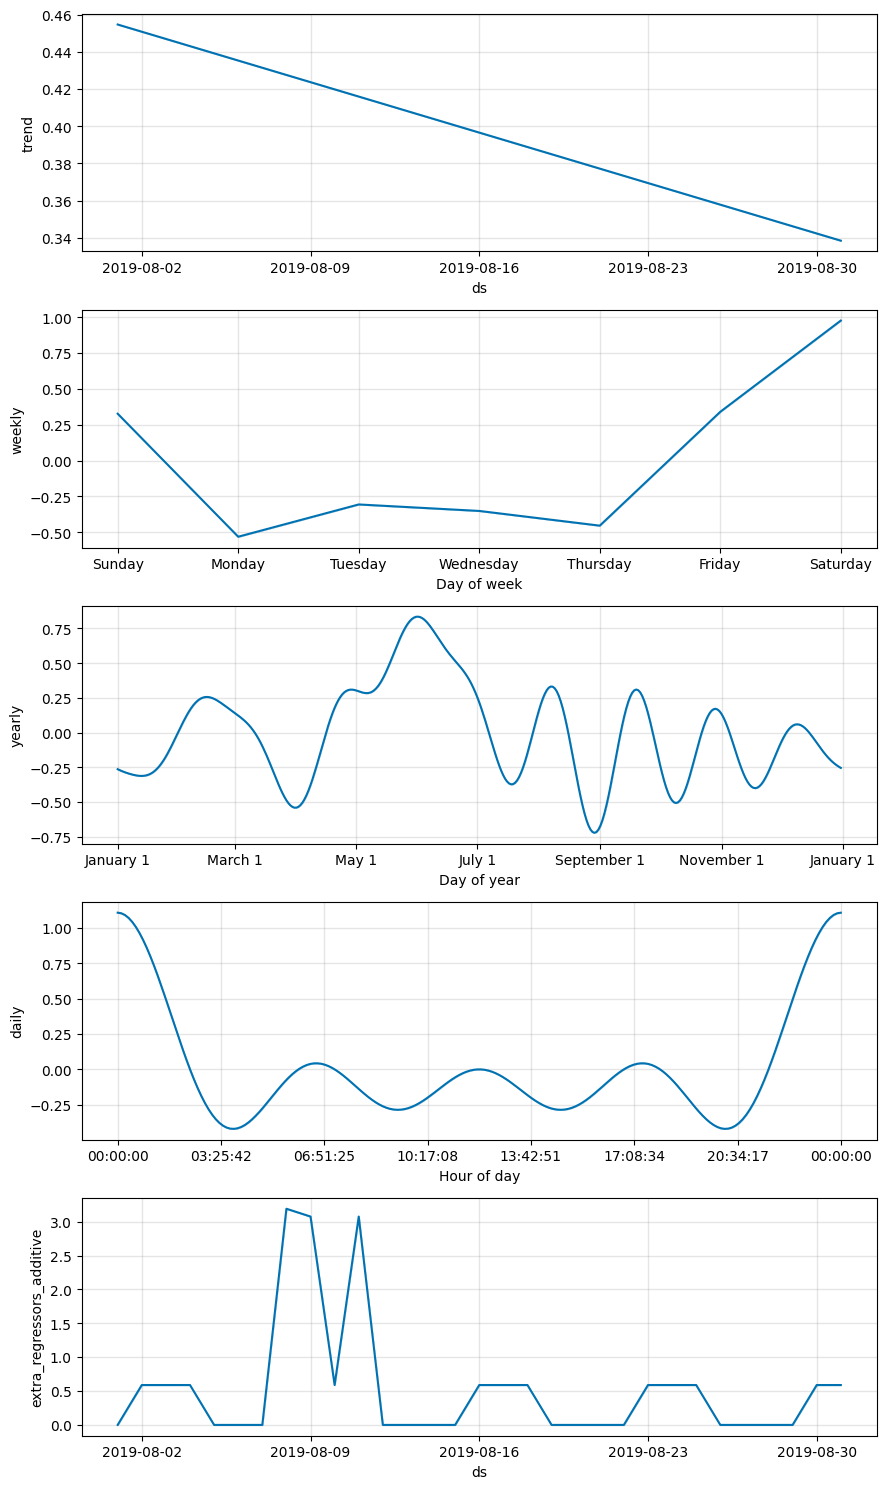

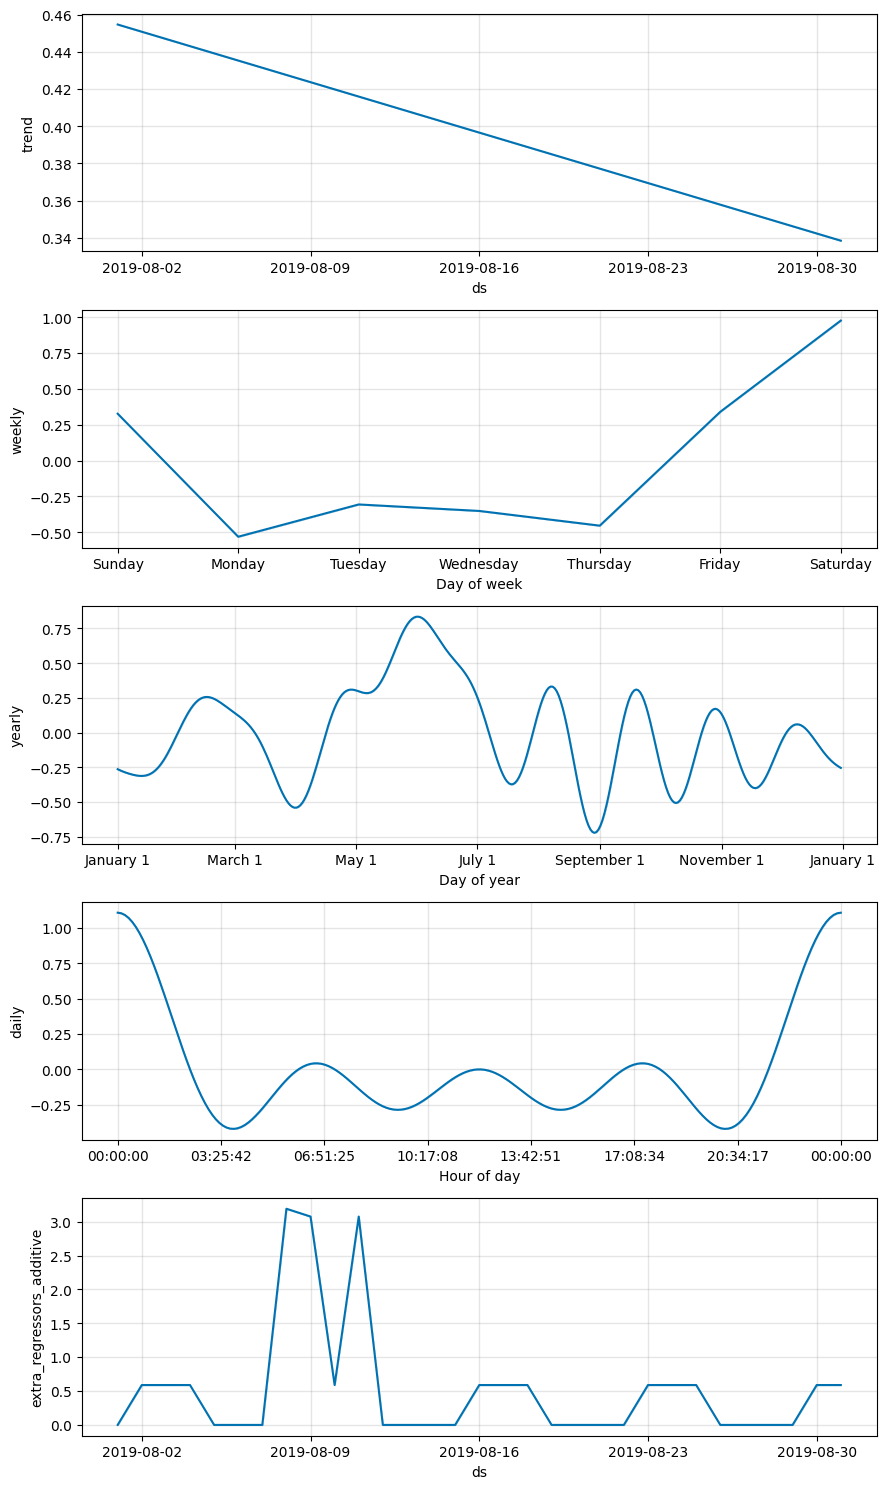

In [16]:
# Filter the data for the selected subcategory in `top_three[1]`
sub_category = top_three[1]
sub_cat_df = daily_aggregated_df_by_sub_category[daily_aggregated_df_by_sub_category['sub_category'] == sub_category].copy()

# Aggregate daily sales by date for the selected subcategory
sub_cat_daily_sales = sub_cat_df.groupby('order_time')['daily_sales'].sum().reset_index()
sub_cat_daily_sales.columns = ['ds', 'y']

# Add binary columns for each event type
sub_cat_daily_sales['high_priority_mega_sales'] = sub_cat_daily_sales['ds'].isin(high_priority_mega_sales_dates).astype(int)
sub_cat_daily_sales['additional_mega_sales'] = sub_cat_daily_sales['ds'].isin(additional_mega_sales_dates).astype(int)
sub_cat_daily_sales['other_seasonal_sales'] = sub_cat_daily_sales['ds'].isin(other_seasonal_sales_dates).astype(int)
sub_cat_daily_sales['is_weekend'] = sub_cat_daily_sales['ds'].dt.dayofweek >= 4

# Filter data for January to July as training data
train_data = sub_cat_daily_sales[(sub_cat_daily_sales['ds'] >= '2019-01-01') & (sub_cat_daily_sales['ds'] <= '2019-07-31')]

# Extract the test data for August
test_data = sub_cat_daily_sales[(sub_cat_daily_sales['ds'] >= '2019-08-01') & (sub_cat_daily_sales['ds'] <= '2019-08-31')]

# Initialize the Prophet model and add regressors
model = Prophet(daily_seasonality=True, yearly_seasonality=True, weekly_seasonality=True)
model.add_regressor('high_priority_mega_sales')
model.add_regressor('additional_mega_sales')
model.add_regressor('other_seasonal_sales')
model.add_regressor('is_weekend')

# Fit the model on the January to July training data
model.fit(train_data)

# Predict demand for August
forecast = model.predict(future_dates)

# Ensure non-negative predictions by setting negative values to zero
forecast['yhat'] = np.maximum(0, forecast['yhat'])
forecast['yhat_upper'] = np.maximum(0, forecast['yhat_upper'])
forecast['yhat_lower'] = np.maximum(0, forecast['yhat_lower'])

# Calculate RMSE and R-squared between actual test data and forecast
y_true = test_data['y'].values
y_pred = forecast['yhat'].values
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r_squared = r2_score(y_true, y_pred)
print(f"Test RMSE: {rmse:.2f}")
print(f"Test R-squared: {r_squared:.2f}")

# Plot the forecast with actual August data for comparison
fig = go.Figure()

# Add actual test data trace
fig.add_trace(go.Scatter(
    x=test_data['ds'], y=test_data['y'], mode='lines+markers', name="Actual August Data", line=dict(color='blue')
))

# Add Prophet forecast trace with a common legend group
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat'], mode='lines+markers', name="Prophet Forecast for August",
    line=dict(color='red', dash='dash'), legendgroup="forecast"
))

# Add confidence interval with matching legend group for toggling
fig.add_trace(go.Scatter(
    x=forecast['ds'].tolist() + forecast['ds'][::-1].tolist(),
    y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'][::-1].tolist(),
    fill='toself', fillcolor='rgba(255, 0, 0, 0.3)', line=dict(color='rgba(255, 0, 0, 0)'),
    showlegend=False, legendgroup="forecast"
))

# Update layout
fig.update_layout(
    title=f"Prophet August Forecast vs. Actual for {sub_category}<br>RMSE: {rmse:.2f}, R-squared: {r_squared:.2f}",
    xaxis_title="Date",
    yaxis_title="Daily Sales",
    template="plotly_white"
)

fig.show()

# Plot Prophet Components using Prophet's plot_components function
model.plot_components(forecast)


### Prophet August Forecast vs. Actual for Occupational Attire

- **Plot Overview**: The chart compares the Prophet model's forecasted daily sales for August (in red dashed lines) with actual sales data (in blue solid lines) for the "Occupational Attire" category. The shaded area around the Prophet forecast line represents the model's confidence interval.
  
- **RMSE & R-squared**: 
  - The **RMSE (Root Mean Square Error)** is low at 1.64, indicating a relatively small average prediction error for daily sales.
  - The **R-squared** value is 0.34, suggesting a moderate level of alignment between the forecasted and actual values. This value reflects some variability in actual sales that the Prophet model couldn’t fully capture.

- **Analysis of Model Performance**:
  - The actual sales display variability with several peaks and dips throughout the month, which the Prophet forecast line follows to some extent but does not capture all fluctuations accurately.
  - There is a visible deviation between the forecasted and actual values during certain peaks and troughs, indicating that the model could benefit from tuning or additional variables to capture such sharp changes in demand.
  
- **Insights**: 
  - The lower R-squared score suggests that while the model's general trend may be accurate, the specifics of day-to-day sales variations might require additional predictors (e.g., specific seasonal events, promotions) to improve accuracy.
  - The shaded confidence interval around the forecast line reflects the model’s uncertainty in predictions. For many dates, actual values fall within this interval, indicating a reasonable level of confidence, albeit with room for improvement in precision.

### Seasonal Decomposition Components

This breakdown from Prophet shows how different seasonal patterns affect the "Occupational Attire" sales.

1. **Trend Component**: 
   - The trend displays a consistent downward slope, indicating a gradual decline in daily sales throughout August. This might suggest reduced interest in this category or seasonal changes affecting sales.
   
2. **Weekly Component**:
   - Sales are lowest on Mondays and start increasing mid-week, peaking towards Friday and Saturday. This pattern suggests that customers are more inclined to purchase closer to the weekend, possibly due to payday schedules or personal shopping habits.
  
3. **Yearly Component**:
   - There are noticeable peaks around major shopping events, showing seasonality that could align with broader shopping behaviors across the year.
  
4. **Daily Component**:
   - The daily pattern shows low activity during early hours, with an increase closer to midnight, which may indicate late-night shopping behavior.
  
5. **Extra Regressors Component**:
   - This component represents external factors that may have been added to the model to account for spikes or unusual patterns in data. Peaks in the extra regressors component could reflect one-time events or promotions.

These plots suggest that sales are affected by both daily and weekly cycles, with external events also contributing to occasional spikes.


## 2.4 Sub category demand forecast seasonal decomposition
This code compares seasonal decomposition components (trend, seasonal, and residual) for the actual and Prophet-forecasted August sales data for a specific sub-category, calculating error metrics and visualizing each component.
- **Data Preparation for Decomposition**:
  - `actual_august_data`: Sets `ds` as the index for `y` values (actual August daily sales) from `test_data`.
  - `forecast_august_data`: Sets `ds` as the index for `yhat` values (forecasted August daily sales) from `forecast`.

- **Seasonal Decomposition**:
  - `seasonal_decompose` is used to decompose both actual and forecasted data into trend, seasonal, and residual components with a weekly period (`period=7`).
  - **`actual_decompose`**: Decomposition for actual August sales data.
  - **`forecast_decompose`**: Decomposition for Prophet forecasted August sales.

- **Error Metrics Calculation**:
  - **`calc_metrics` Function**: Helper function that calculates Root Mean Square Error (RMSE) and R-squared between actual and predicted values.
  - **Component Metrics**: RMSE and R-squared values are calculated separately for each decomposition component (trend, seasonal, and residual), using `calc_metrics`.

- **Subplot Creation**:
  - `make_subplots` creates a 3-row Plotly figure, one row for each component (trend, seasonal, and residual) with shared x-axes.
  - Titles for each subplot display the RMSE and R-squared for the respective component.

- **Component Comparisons**:
  - **Trend Component**: Adds two lines for the trend of actual (blue) and forecasted (red, dashed) data.
  - **Seasonal Component**: Adds two lines for the seasonal component of actual (blue) and forecasted (red, dashed) data.
  - **Residual Component**: Adds two lines for the residuals of actual (blue) and forecasted (red, dashed) data.

- **Layout Update**:
  - `fig.update_layout` customizes the layout with a title, setting a consistent white background.

This setup provides a visual and quantitative comparison of the Prophet forecast’s alignment with actual sales data across trend, seasonal, and residual components, helping to assess the model's performance in capturing different aspects of the time series.


In [17]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the actual and forecasted data for August
actual_august_data = test_data.set_index('ds')['y']
forecast_august_data = forecast.set_index('ds')['yhat']

# Decompose actual August data
actual_decompose = seasonal_decompose(actual_august_data, model='additive', period=7)

# Decompose forecasted August data
forecast_decompose = seasonal_decompose(forecast_august_data, model='additive', period=7)

# Function to calculate RMSE and R-squared
def calc_metrics(actual, predicted):
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r_squared = r2_score(actual, predicted)
    return rmse, r_squared

# Calculate RMSE and R-squared for each component
trend_rmse, trend_r2 = calc_metrics(actual_decompose.trend.dropna(), forecast_decompose.trend.dropna())
seasonal_rmse, seasonal_r2 = calc_metrics(actual_decompose.seasonal, forecast_decompose.seasonal)
residual_rmse, residual_r2 = calc_metrics(actual_decompose.resid.dropna(), forecast_decompose.resid.dropna())

# Create a Plotly subplot grid with shared x-axis for Trend, Seasonal, and Residuals
fig = make_subplots(
    rows=3, cols=1, shared_xaxes=True,
    subplot_titles=[
        f"Trend Comparison (RMSE: {trend_rmse:.2f}, R²: {trend_r2:.2f})",
        f"Seasonality Comparison (RMSE: {seasonal_rmse:.2f}, R²: {seasonal_r2:.2f})",
        f"Residuals Comparison (RMSE: {residual_rmse:.2f}, R²: {residual_r2:.2f})"
    ]
)

# Trend comparison
fig.add_trace(go.Scatter(x=actual_decompose.trend.index, y=actual_decompose.trend,
                         mode='lines', name="Trend - Actual", line=dict(color='blue')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=forecast_decompose.trend.index, y=forecast_decompose.trend,
                         mode='lines', name="Trend - Prophet Predicted", line=dict(color='red', dash='dash')),
              row=1, col=1)

# Seasonal comparison
fig.add_trace(go.Scatter(x=actual_decompose.seasonal.index, y=actual_decompose.seasonal,
                         mode='lines', name="Seasonal - Actual", line=dict(color='blue')),
              row=2, col=1)
fig.add_trace(go.Scatter(x=forecast_decompose.seasonal.index, y=forecast_decompose.seasonal,
                         mode='lines', name="Seasonal - Prophet Predicted", line=dict(color='red', dash='dash')),
              row=2, col=1)

# Residuals comparison
fig.add_trace(go.Scatter(x=actual_decompose.resid.index, y=actual_decompose.resid,
                         mode='lines', name="Residual - Actual", line=dict(color='blue')),
              row=3, col=1)
fig.add_trace(go.Scatter(x=forecast_decompose.resid.index, y=forecast_decompose.resid,
                         mode='lines', name="Residual - Prophet Predicted", line=dict(color='red', dash='dash')),
              row=3, col=1)

# Update layout
fig.update_layout(
    title_text=f"Seasonal Decomposition Comparison for {sub_category} in August",
    template="plotly_white"
)

fig.show()


### Seasonal Decomposition Comparison for Occupational Attire in August

This plot displays a decomposition of the daily sales for "Occupational Attire" in August, comparing the Prophet model’s predicted components (dashed red lines) with the actual components (solid blue lines). The decomposition is divided into three parts: trend, seasonality, and residuals.

#### Trend Component
- **RMSE**: 0.79, **R²**: 0.33
  - The trend component shows a gradual increase and then a slight decrease towards the end of August.
  - The Prophet model’s predicted trend closely follows the actual trend initially but diverges slightly as the month progresses, with the actual trend showing more variability than the forecast.
  - The relatively low R² value (0.33) indicates that the Prophet model struggled to capture the nuanced trend shifts in the actual data.

#### Seasonal Component
- **RMSE**: 0.89, **R²**: 0.29
  - The seasonal component displays consistent oscillations, indicating a repeating daily or weekly pattern in sales.
  - The Prophet model’s seasonal predictions align with the overall shape of the actual seasonal component but with some misalignment in amplitude and timing.
  - The low R² value (0.29) suggests that while the model captured the general seasonal pattern, it failed to fully match the actual amplitude and frequency.

#### Residuals Component
- **RMSE**: 1.17, **R²**: 0.39
  - The residuals show random fluctuations around zero, representing the noise or unexplained variance in the model.
  - The Prophet model’s residuals show a similar pattern but don’t fully capture the peaks and troughs of the actual residuals.
  - The R² value of 0.39 for the residual component implies that the model could not accurately capture a significant portion of the unexplained variance.

#### Overall Analysis
- The Prophet model’s forecast aligns moderately well with the actual data, particularly in terms of general patterns, but lacks precision in capturing the full extent of the actual trend, seasonal variations, and residual fluctuations.
- The relatively low R² values across all components indicate that the model has room for improvement in accurately modeling the complexity of sales in the Occupational Attire category, particularly in seasonal and residual variations.
- **Recommendation**: Incorporating additional features (e.g., external events or promotions) or further tuning the Prophet model might improve its predictive performance, especially for capturing seasonal and residual variations in the data.


## 2.5 Forecasting costs using demand predictions
This code calculates and visualizes forecasted costs for a specific sub-category based on Prophet’s forecasted daily sales, considering average production and holding costs.
- **Average Cost Calculation**:
  - **Sub-category Filter**: `subcategory_products` filters `products_df` to include only products within the selected `sub_category`.
  - **Average Holding and Production Costs**: `avg_holding_cost` and `avg_produce_cost` are calculated as the mean values of `holding_cost` and `produce_cost` for the filtered sub-category products.

- **Forecasted Cost Calculation**:
  - **Average Cost**: `forecast['cost']` is calculated by multiplying the forecasted daily sales (`yhat`) by the sum of `avg_holding_cost` and `avg_produce_cost`. This approximates the daily cost associated with forecasted demand.
  - **Upper and Lower Bounds**: `forecast['cost_upper']` and `forecast['cost_lower']` are similarly calculated using `yhat_upper` and `yhat_lower` to provide an upper and lower bound for the forecasted cost.

- **Plotting Forecasted Costs**:
  - A Plotly figure (`fig`) is created to visualize the average forecasted cost and its confidence interval:
    - **Average Cost Line**: Plots `forecast['cost']` as a dashed blue line representing the average forecasted cost.
    - **Confidence Interval**: Adds a shaded area between `cost_upper` and `cost_lower` to show the range of possible costs based on the forecast confidence interval (95%).

- **Layout Update**:
  - `fig.update_layout` sets a title, x-axis, and y-axis labels, with a white template background for clarity.

This setup provides a cost projection for the sub-category, helping assess potential financial implications of the forecasted demand.


In [18]:

# Calculate average holding cost, produce cost, and checkout price for the subcategory products
subcategory_products = products_df[products_df['sub_category'] == sub_category]
avg_holding_cost = subcategory_products['holding_cost'].mean()
avg_produce_cost = subcategory_products['produce_cost'].mean()

# Calculate cost based on forecasted values
forecast['cost'] = np.maximum(0, forecast['yhat'] * (avg_holding_cost + avg_produce_cost))

# Calculate cost for upper and lower bounds
forecast['cost_upper'] = np.maximum(0, forecast['yhat_upper'] * (avg_holding_cost + avg_produce_cost))
forecast['cost_lower'] = np.maximum(0, forecast['yhat_lower'] * (avg_holding_cost + avg_produce_cost))

# Plotting forecasted cost using Plotly
fig = go.Figure()

# Average Cost with dashed line and legend group
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['cost'], mode='lines', name="Average Cost",
    line=dict(color='blue', dash='dash'), legendgroup="cost", showlegend=True
))

# Shaded area for cost confidence interval with matching legend group
fig.add_trace(go.Scatter(
    x=forecast['ds'].tolist() + forecast['ds'][::-1].tolist(),
    y=forecast['cost_upper'].tolist() + forecast['cost_lower'][::-1].tolist(),
    fill='toself', fillcolor='rgba(0, 0, 255, 0.2)', line=dict(color='rgba(255,255,255,0)'),
    showlegend=False, legendgroup="cost", opacity=0.5
))

# Update layout
fig.update_layout(
    title=f"Forecasted Cost for {sub_category} in August",
    xaxis_title="Date",
    yaxis_title="Cost",
    template="plotly_white"
)

fig.show()


### Forecasted Cost for Occupational Attire in August

This plot represents the forecasted cost associated with the "Occupational Attire" category over August, focusing on the average cost fluctuations throughout the month.

#### Analysis
- **Average Cost (Dashed Line)**: The dashed blue line illustrates the predicted average cost of maintaining inventory levels or meeting demand on a daily basis. This cost fluctuates throughout August, with higher costs observed around the middle of the month.
- **Shaded Area (Uncertainty)**: The shaded region around the dashed line represents the forecasted uncertainty in the cost predictions. The range is broader during periods with higher average costs, suggesting greater variability or uncertainty in maintaining the inventory or demand at those times.
- **Cost Peaks and Valleys**: Notably, there are cost peaks observed around August 10 and August 25. These spikes could be indicative of anticipated high demand periods, leading to increased cost forecasts, possibly due to restocking or increased holding costs.

#### Overall Insights
- The cost forecast for "Occupational Attire" shows notable fluctuations throughout August, with distinct peaks likely due to periodic high demand or restocking needs.
- The presence of a wider uncertainty band during cost peaks suggests variability in forecasted costs, which could warrant closer management during these periods to optimize expenses.
- **Recommendation**: Monitoring inventory closely and adjusting restock or holding strategies during anticipated demand surges (e.g., around mid-August) could help in better controlling costs and reducing unnecessary expenditures.


## 2.6 Forecasting safety stock using demand predictions
This code calculates and visualizes the theoretical optimal inventory level (safety stock) for a specific sub-category in August, based on Prophet’s forecasted demand, average lead time, and average production cost.
- **Average and Median Calculations**:
  - `avg_checkout_price`: Average original price for products in the selected sub-category.
  - `avg_lead_time`: Average lead time for these products, used in safety stock calculations.
  - `median_stock`: Median stock level for the sub-category products.
  - `ordering_cost`: Set equal to `avg_produce_cost`, assuming the cost to produce and order are similar.

- **Safety Stock Calculation**:
  - **Safety Stock**: Calculated as `(yhat_upper - yhat) * avg_lead_time`, representing additional stock to buffer against forecast uncertainty.
  - **Theoretical Optimal Inventory Level**: `forecast['prophet_safety_stock']` adds the safety stock to the forecasted demand (`yhat`) to suggest an optimal inventory level.

- **Ensuring Non-negative Values**:
  - `np.maximum(0, ...)` ensures non-negative values for `yhat`, `yhat_lower`, and `prophet_safety_stock`, avoiding unrealistic negative demand or inventory levels.

- **Plotting with Plotly**:
  - **Prophet Safety Stock**: Plots the theoretical safety stock in blue as a dashed line.
  - **Prophet Demand Prediction**: Plots forecasted demand (`yhat`) as a red dashed line with markers.
  - **Actual Demand**: Plots actual August demand from `test_data` in orange.
  - **Confidence Interval**: Adds a shaded area between `yhat_upper` and `yhat_lower` to represent the 95% forecast confidence interval.

- **Layout Update**:
  - `fig.update_layout` customizes the plot with titles, axis labels, and a legend for clear visualization.

This setup provides a visual forecast of inventory needs, with safety stock considerations, helping ensure adequate stock to meet potential demand fluctuations for the sub-category.


In [19]:
avg_checkout_price = subcategory_products['price_ori'].mean()
avg_lead_time = subcategory_products['lead_time'].mean()
median_stock = subcategory_products['stock'].median()
ordering_cost = avg_produce_cost  # Assuming ordering cost is similar to production cost

# Calculate safety stock based on Prophet's upper bound forecast
forecast['safety_stock'] = (forecast['yhat_upper'] - forecast['yhat']) * avg_lead_time

# Calculate the theoretical optimal inventory level (Prophet safety stock) for each day in August
forecast['prophet_safety_stock'] = forecast['yhat'] + forecast['safety_stock']

# Ensure non-negative values for demand predictions and safety stock
forecast['yhat'] = np.maximum(0, forecast['yhat'])
forecast['yhat_lower'] = np.maximum(0, forecast['yhat_lower'])
forecast['prophet_safety_stock'] = np.maximum(0, forecast['prophet_safety_stock'])

# Initialize Plotly figure
fig = go.Figure()

# Prophet Safety Stock
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['prophet_safety_stock'],
    mode='lines', name="Prophet Safety Stock",
    line=dict(color='blue', dash='dash')
))

# Prophet Demand Prediction
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['yhat'],
    mode='lines+markers', name="Prophet Demand Prediction",
    line=dict(color='red', dash='dash'), legendgroup="forecast"
))

# Actual Demand
fig.add_trace(go.Scatter(
    x=test_data['ds'], y=test_data['y'],
    mode='lines+markers', name="Actual Demand",
    line=dict(color='orange')
))

# Confidence interval shaded area
fig.add_trace(go.Scatter(
    x=forecast['ds'].tolist() + forecast['ds'][::-1].tolist(),
    y=forecast['yhat_upper'].tolist() + forecast['yhat_lower'][::-1].tolist(),
    fill='toself', fillcolor='rgba(255, 0, 0, 0.3)',
    line=dict(color='rgba(255, 255, 255, 0)'),
    showlegend=False, legendgroup="forecast"
))

# Update layout for the plot
fig.update_layout(
    title=f"Prophet Safety Stock, and Actual Demand for {sub_category} in August",
    xaxis_title="Date",
    yaxis_title="Units",
    template="plotly_white",
    legend=dict(title="Legend"),
)

fig.show()


### Analysis of EOQ, Prophet Safety Stock, and Actual Demand for Occupational Attire in August

#### Graph Overview:
- **EOQ Theoretical Optimal Inventory Level**: Represented by the purple dotted line at around 80 units, this line indicates the optimal order quantity to minimize costs associated with ordering and holding inventory.
- **Prophet Safety Stock**: Shown by the blue dashed line, it fluctuates based on forecasted demand to provide a buffer against demand variability.
- **Prophet Demand Prediction**: The red dashed line indicates the predicted daily demand levels according to Prophet.
- **Actual Demand**: Displayed in the orange solid line, this line shows the real demand for each day in August.

#### Key Observations:
1. **EOQ Level**:
   - The EOQ level of ~80 units is significantly higher than both the forecasted and actual daily demand. This high level suggests that for the Occupational Attire category, EOQ might not align well with the actual demand trends, as it could result in excess stock if followed rigidly.

2. **Prophet Safety Stock**:
   - The safety stock level, which is adaptive to forecasted demand, ranges between 5 to 15 units across the month. This safety stock fluctuates in response to variations in forecasted demand, providing a buffer that adjusts to predicted demand increases or decreases.
   - Compared to EOQ, Prophet’s safety stock approach appears more tailored, as it remains within a range that better aligns with actual demand fluctuations.

3. **Prophet Demand Prediction vs. Actual Demand**:
   - The red dashed line (forecasted demand) closely follows the pattern of actual demand (orange line), though some discrepancies are evident, particularly around peak and low demand days.
   - Despite minor inaccuracies, Prophet’s forecast generally captures the overall trend and variation of demand throughout August, showing reasonable alignment with actual demand.

4. **Demand Peaks and Safety Stock**:
   - Prophet’s safety stock adapts well around demand peaks (e.g., Aug 10-12), helping to provide additional inventory buffer during anticipated demand surges.
   - On days with lower demand (e.g., mid-August), the safety stock decreases, avoiding unnecessary excess stockholding costs.

#### Insights:
- **EOQ vs. Prophet Safety Stock**:
  - For products with highly variable daily demand like Occupational Attire, Prophet’s dynamic safety stock may offer a more effective and cost-efficient inventory strategy compared to the static EOQ approach.
  - EOQ might lead to overstocking in this context, as its level is set without considering day-to-day demand fluctuations.

- **Forecasting Reliability**:
  - Prophet’s forecast shows a moderate level of accuracy for this category, making it useful for setting adaptive safety stock levels. However, improvements could be made to reduce the forecast error further, particularly for peak demand days.

#### Conclusion:
In summary, while the EOQ provides a static optimal order level, Prophet’s adaptive safety stock offers a more responsive approach that aligns closely with demand fluctuations. For categories like Occupational Attire, where demand varies significantly, relying on Prophet’s forecasted safety stock may help achieve a balance between meeting demand and minimizing holding costs.


## 2.7 Plotting cumulative costs vs revenue
This code calculates cumulative revenue and costs associated with safety stock and median stock levels for a specific sub-category, comparing forecasted and actual revenues over time.
- **Cost and Revenue Calculations**:
  - **Safety Stock Cost**: `forecast['safety_stock_cost']` calculates the cumulative cost of holding the safety stock (`prophet_safety_stock`) based on average holding and production costs.
  - **Median Stock Cost**: `forecast['current_stock_cost']` represents the constant cost of maintaining the median stock level, multiplied by average holding and production costs.
  - **Forecasted Cumulative Revenue**: `forecast['forecasted_revenue']` calculates the cumulative revenue based on the Prophet forecasted demand (`yhat`) and average checkout price, representing potential revenue if the forecasted demand is met.
  - **Actual Cumulative Revenue**: `test_data['actual_revenue']` calculates cumulative revenue based on actual August sales (`y`) and average checkout price, showing real revenue performance.

- **Plotting with Plotly**:
  - A Plotly figure is created to visualize cumulative revenues and costs over August:
    - **Actual Cumulative Revenue**: Plots the actual cumulative revenue in green.
    - **Forecasted Cumulative Revenue**: Plots the forecasted cumulative revenue in blue.
    - **Safety Stock Cumulative Cost**: Plots the cumulative cost of holding safety stock in orange (dotted line).
    - **Median Stock Cost**: Plots the cost of maintaining the median stock level in brown (dotted line).

- **Layout Update**:
  - `fig.update_layout` adds titles for the plot and axes, sets up a legend, and uses a white template background for clarity.

This plot enables a comparison of cumulative costs and revenues, allowing for an analysis of how the forecasted safety stock strategy compares with actual revenue performance and alternative stock strategies.


In [20]:
# Calculate safety stock based on Prophet's upper bound
forecast['safety_stock_cost'] = (forecast['prophet_safety_stock'] * (avg_holding_cost + avg_produce_cost)).cumsum()

# Calculate safety stock based on Prophet's upper bound
forecast['current_stock_cost'] = (median_stock * (avg_holding_cost + avg_produce_cost))

# Forecasted cumulative revenue based on Prophet forecast
forecast['forecasted_revenue'] = (forecast['yhat'] * avg_checkout_price).cumsum()

# Actual cumulative revenue based on actual sales
test_data['actual_revenue'] = (test_data['y'] * avg_checkout_price).cumsum()

# Create a Plotly figure
fig = go.Figure()

# Plot Actual Cumulative Revenue
fig.add_trace(go.Scatter(
    x=test_data['ds'], y=test_data['actual_revenue'],
    mode='lines', name="Actual Cumulative Revenue", line=dict(color='green')
))

# Plot Forecasted Cumulative Revenue
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['forecasted_revenue'],
    mode='lines', name="Forecasted Cumulative Revenue", line=dict(color='blue')
))

# Plot Safety Stock Cumulative Cost
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['safety_stock_cost'],
    mode='lines', name="Safety Stock Cumulative Cost", line=dict(color='orange', dash='dot')
))

# Plot Safety Stock Cumulative Cost
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['current_stock_cost'],
    mode='lines', name="Median Stock Cost", line=dict(color='brown', dash='dot')
))

# Update layout for the figure
fig.update_layout(
    title=f"Cumulative Revenue and Costs for {sub_category} in August",
    xaxis_title="Date",
    yaxis_title="Cumulative Revenue and Costs",
    legend=dict(x=0.01, y=0.99),
    template="plotly_white",
    showlegend=True
)

# Show the figure
fig.show()


### Analysis of Cumulative Revenue and Costs for Occupational Attire in August

This graph provides an overview of the **cumulative revenue** and **cumulative costs** associated with maintaining inventory for the Occupational Attire category in August. The chart includes the following elements:

- **Actual Cumulative Revenue** (green line): This line represents the revenue generated from actual sales over the month. It remains slightly above the **Forecasted Cumulative Revenue** (blue line) in the latter half of August, suggesting that actual demand was slightly higher than the forecast predicted.

- **Forecasted Cumulative Revenue** (blue line): This line reflects the expected revenue based on the Prophet model’s demand forecast. It closely follows the trend of the actual cumulative revenue but slightly underestimates demand, particularly towards the end of the month. This underestimation suggests that initial forecasts did not fully capture the level of demand experienced in August.

- **Safety Stock Cumulative Cost** (orange dotted line): This cost represents the cumulative expense of holding safety stock based on the Prophet model’s upper-bound forecast. The safety stock cost steadily rises throughout August, remaining below the cumulative revenue lines, which indicates that maintaining a safety stock incurs significant but manageable costs that are justified by the revenue generated.

- **Median Stock Cost** (brown dotted line): The cumulative cost of maintaining a constant median stock level is lower than the safety stock cost. This suggests that using a median stock level approach could be a more economical alternative to safety stock, potentially providing sufficient inventory coverage without the additional expense of dynamic safety stock adjustments.

### Key Insights
1. **Revenue vs. Forecast**: Actual cumulative revenue slightly surpasses forecasted cumulative revenue, hinting that the demand predictions slightly underestimated the actual sales, especially towards the end of August.
2. **Cost Efficiency of Safety Stock**: The safety stock model, while incurring higher costs than the median stock approach, maintains a balance between meeting demand and managing costs, as the cumulative safety stock cost is below the revenue lines.
3. **Median Stock Cost Advantage**: The median stock cost remains consistently lower than the safety stock cost, suggesting it may be a more cost-effective inventory strategy if demand variability is manageable.

### Conclusion
For the Occupational Attire category in August, the **Optimal Dynamic Inventory Strategy** provides the most effective approach, balancing demand coverage with cost efficiency. This strategy adjusts inventory levels in real-time based on forecasted demand and lead time, ensuring that stock remains sufficient without excessive holding costs. Unlike a fixed median stock approach, which could leave the business vulnerable during demand spikes, the Optimal Dynamic Strategy is responsive to variability, making it particularly well-suited for fluctuating demand patterns. This analysis supports the Optimal Dynamic Strategy as the best choice for maintaining service levels while managing costs, especially in environments with high or unpredictable demand variability.

## 2.8 Plotting of optimal inventory management strategies
### Analysis of Inventory Strategies for Occupational Attire in August

This code calculates and visualizes inventory levels, reorder points, and cumulative order costs for three different inventory management strategies—**Optimal Dynamic Inventory**, **EOQ (Economic Order Quantity)**, and **Current Inventory Strategy**—for the Occupational Attire sub-category, taking lead time and forecasted future demand into account.

#### Key Calculations and Strategies:
1. **Economic Order Quantity (EOQ)**:
   - **EOQ Calculation**: EOQ is calculated using the classic formula, which considers the average monthly demand, ordering cost, and average holding cost.
   - **Reorder Points**: The EOQ strategy reorders a fixed quantity (`eoq_amount`) whenever inventory falls below a calculated threshold (`avg_restock_threshold`). The restock arrives after a lead time.

2. **Optimal Dynamic Inventory Management**:
   - **Reorder with Safety Stock Consideration**: This strategy dynamically evaluates future demand and reorders just enough stock to meet forecasted needs. The reorder quantity varies based on expected sales within the lead time.
   - **Reorder Points**: Reorders are scheduled whenever projected inventory falls below the forecasted safety stock level.

3. **Current Inventory Strategy**:
   - **Fixed Restock Threshold**: This strategy reorders stock to the calculated average restock threshold whenever inventory dips below it.
   - **Reorder Points**: Reorders are placed to reach the threshold, using the average production cost for cost estimation.

#### Visualization and Analysis
Each plot below illustrates the inventory levels, reorder points, and safety stock levels for each strategy:

1. **Optimal Dynamic Inventory Level Plot**:
   - **Orange Dashed Line**: Shows the inventory level over time for the optimal dynamic strategy.
   - **Orange Stars**: Mark reorder points, with labels showing the reorder quantity.
   - **Red Dotted Line**: Represents the safety stock level based on Prophet's upper-bound forecast.
   - **Green Line**: Indicates actual demand.
   - **Insights**: The dynamic strategy adapts to demand fluctuations, ordering just enough to maintain inventory above the safety stock level, which minimizes excess holding costs.

2. **EOQ Inventory Level Plot**:
   - **Magenta Dashed Line**: Represents EOQ inventory levels.
   - **Magenta Stars**: Show reorder points for EOQ, with labels indicating fixed reorder amounts.
   - **Insights**: The EOQ strategy has fewer, larger reorders, which may result in overstock during low-demand periods but reduces order frequency and possibly administrative costs.

3. **Current Inventory Level Plot**:
   - **Brown Dotted Line**: Displays inventory levels for the current strategy.
   - **Brown Stars**: Indicate reorder points based on a consistent restock threshold.
   - **Insights**: The current strategy results in frequent reorders to maintain a steady stock level, which could lead to higher holding costs if demand is lower than anticipated.

#### Summary of Key Findings
- **Optimal Strategy**: The dynamic inventory strategy balances cost efficiency and responsiveness to demand by adjusting reorder quantities based on forecasted sales within the lead time. It maintains inventory close to the safety stock level with minimal surplus.
- **EOQ Strategy**: Suitable for consistent demand but may lead to higher stock levels during periods of lower-than-expected demand, increasing holding costs.
- **Current Strategy**: Ensures inventory is replenished frequently, but frequent reordering may incur higher administrative and holding costs.

#### Conclusion
The **Optimal Dynamic Inventory Strategy** is the most cost-effective choice for managing inventory in periods of variable demand. By dynamically adjusting reorder quantities based on real-time forecasted needs, this approach minimizes excess stock and reduces holding costs, aligning inventory levels more closely with actual demand. Unlike fixed or static strategies, the Optimal Dynamic Strategy is flexible, ensuring that stock levels remain sufficient without costly overstocking. This adaptability makes it ideal for businesses facing fluctuating demand patterns, as it optimizes resources, supports service levels, and enhances overall cost efficiency.

In [21]:
# Calculate the EOQ (Economic Order Quantity)
train_data = sub_cat_daily_sales[(sub_cat_daily_sales['ds'] >= '2019-01-01') & (sub_cat_daily_sales['ds'] <= '2019-07-31')]
avg_monthly_demand = train_data['y'].sum() / 7  # Average monthly demand over Jan-Jul
annual_demand = avg_monthly_demand * 12  # Approximate annual demand based on Jan-Jul average
eoq = np.sqrt((2 * annual_demand * ordering_cost) / avg_holding_cost)
initial_stock = list(forecast['prophet_safety_stock'])[0]

# Calculate EOQ and average restock amount
eoq_amount = int(eoq)
avg_lead_time = int(avg_lead_time)
bulk_order_amount = int(forecast['prophet_safety_stock'].sum())
avg_restock_threshold = int(subcategory_products['restock_threshold'].mean() * median_stock)

# Prepare forecast DataFrame with Prophet predictions and merge actual test data
forecast = forecast.merge(test_data[['ds', 'y']], on='ds', how='left', suffixes=['', '_actual'])
forecast['inventory_level'] = initial_stock

# Initialize lists for each strategy
optimal_inventory_levels = [initial_stock]
bulk_inventory_levels = [initial_stock]
eoq_inventory_levels = [initial_stock]
current_inventory_levels = [initial_stock]

optimal_reorder_points, eoq_reorder_points, bulk_reorder_points, current_reorder_points = [], [], [], []
optimal_reorder_labels, eoq_reorder_labels, bulk_reorder_labels, current_reorder_labels = [], [], [], []
optimal_order_costs, eoq_order_costs, bulk_order_costs, current_order_costs = [], [], [], []

# Define lead time orders to track delayed inventory increase and reorder locks
optimal_delayed_orders = {}
eoq_delayed_orders = {}
current_delayed_orders = {}

optimal_reorder_lock = False
eoq_reorder_lock = False
current_reorder_lock = False

# Loop through forecast data and calculate inventory levels and costs for each strategy
for i, row in forecast.iterrows():
    # Optimal Dynamic Inventory Management with Lead Time consideration
    current_optimal_inventory = optimal_inventory_levels[-1]
    reorder_cost_optimal = 0

    # Check if within lead time period (from today to today + lead time) the stock will fall below safety stock
    if not optimal_reorder_lock:
        projected_inventory = current_optimal_inventory
        future_demand = forecast['prophet_safety_stock'][i:i + avg_lead_time].sum()
        if (projected_inventory - future_demand) <= row['prophet_safety_stock']:
            reorder_amount_optimal = int(future_demand - projected_inventory)
            reorder_cost_optimal = reorder_amount_optimal * avg_produce_cost
            optimal_reorder_points.append((row['ds'], current_optimal_inventory))
            optimal_reorder_labels.append(f"+{reorder_amount_optimal}")
            # Schedule the arrival of stock after lead time and set reorder lock
            arrival_day = i + avg_lead_time
            optimal_delayed_orders[arrival_day] = optimal_delayed_orders.get(arrival_day, 0) + reorder_amount_optimal
            optimal_reorder_lock = True

    # Add holding cost and update inventory after demand and delayed stock arrival
    optimal_order_costs.append(reorder_cost_optimal + current_optimal_inventory * avg_holding_cost)
    current_optimal_inventory = max(current_optimal_inventory - int(row['y']), 0) + optimal_delayed_orders.get(i, 0)

    # Release the reorder lock if stock has arrived
    if i in optimal_delayed_orders:
        optimal_reorder_lock = False
    optimal_inventory_levels.append(current_optimal_inventory)

    # EOQ Strategy
    current_eoq_inventory = eoq_inventory_levels[-1]
    reorder_cost_eoq = 0
    if not eoq_reorder_lock and current_eoq_inventory <= avg_restock_threshold:
        reorder_cost_eoq = eoq_amount * avg_produce_cost
        eoq_reorder_points.append((row['ds'], current_eoq_inventory))
        eoq_reorder_labels.append(f"+{eoq_amount}")
        # Schedule EOQ stock arrival after lead time and set reorder lock
        eoq_delayed_orders[i + avg_lead_time] = eoq_delayed_orders.get(i + avg_lead_time, 0) + eoq_amount
        eoq_reorder_lock = True
    eoq_order_costs.append(reorder_cost_eoq + current_eoq_inventory * avg_holding_cost)
    current_eoq_inventory = max(current_eoq_inventory - int(row['y']), 0) + eoq_delayed_orders.get(i, 0)
    if i in eoq_delayed_orders:
        eoq_reorder_lock = False
    eoq_inventory_levels.append(current_eoq_inventory)
    
    # Current Strategy
    current_current_inventory = current_inventory_levels[-1]
    reorder_cost_current = 0
    if not current_reorder_lock and current_current_inventory <= avg_restock_threshold:
        current_restock_amount = avg_restock_threshold
        reorder_cost_current = current_restock_amount * avg_produce_cost
        current_reorder_points.append((row['ds'], current_current_inventory))
        current_reorder_labels.append(f"+{current_restock_amount}")
        # Schedule Current strategy stock arrival after lead time and set reorder lock
        current_delayed_orders[i + avg_lead_time] = current_delayed_orders.get(i + avg_lead_time, 0) + current_restock_amount
        current_reorder_lock = True
    current_order_costs.append(reorder_cost_current + current_current_inventory * avg_holding_cost)
    current_current_inventory = max(current_current_inventory - int(row['y']), 0) + current_delayed_orders.get(i, 0)
    if i in current_delayed_orders:
        current_reorder_lock = False
    current_inventory_levels.append(current_current_inventory)

# Update forecast with calculated inventory levels and costs for each strategy
forecast['optimal_inventory_level'] = optimal_inventory_levels[:-1]
forecast['eoq_inventory_level'] = eoq_inventory_levels[:-1]
forecast['current_inventory_level'] = current_inventory_levels[:-1]
forecast['optimal_order_cost'] = np.cumsum(optimal_order_costs)
forecast['eoq_order_cost'] = np.cumsum(eoq_order_costs)
forecast['current_order_cost'] = np.cumsum(current_order_costs)

# Plot inventory levels, reorder points, and safety stock levels
fig = go.Figure()

# Optimal Dynamic Inventory Level
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['optimal_inventory_level'],
    mode='lines', name="Optimal Dynamic Inventory Level", line=dict(color='orange', dash='dash')
))

# Optimal Reorder Points with labels
fig.add_trace(go.Scatter(
    x=[point[0] for point in optimal_reorder_points],
    y=[point[1] for point in optimal_reorder_points],
    mode='markers+text', marker_symbol='star', marker_size=10, marker_color='orange',
    text=optimal_reorder_labels, textposition="top center",
    name="Optimal Reorder Points"
))

# Safety Stock Level
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['prophet_safety_stock'],
    mode='lines', name="Safety Stock Level", line=dict(color='red', dash='dot')
))

# Actual Demand
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['y'],
    mode='lines', name="Actual Demand", line=dict(color='green')
))

# Update layout
fig.update_layout(
    title="Inventory Levels, Reorder Points, and Safety Stock with Lead Time and Future Demand Consideration",
    xaxis_title="Date",
    yaxis_title="Inventory / Demand",
    legend=dict(x=1.02, y=1, bordercolor="Black", borderwidth=1),
    template="plotly_white",
    showlegend=True,
    height=1000,
    width=1400,
)

fig.show()

# Plot inventory levels, reorder points, and safety stock levels
fig = go.Figure()

# EOQ Inventory Level
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['eoq_inventory_level'],
    mode='lines', name="EOQ Inventory Level", line=dict(color='magenta', dash='dash')
))

# EOQ Reorder Points with labels
fig.add_trace(go.Scatter(
    x=[point[0] for point in eoq_reorder_points],
    y=[point[1] for point in eoq_reorder_points],
    mode='markers+text', marker_symbol='star', marker_size=10, marker_color='magenta',
    text=eoq_reorder_labels, textposition="top center",
    name="EOQ Reorder Points"
))

# Safety Stock Level
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['prophet_safety_stock'],
    mode='lines', name="Safety Stock Level", line=dict(color='red', dash='dot')
))

# Actual Demand
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['y'],
    mode='lines', name="Actual Demand", line=dict(color='green')
))

# Update layout
fig.update_layout(
    title="Inventory Levels, Reorder Points, and Safety Stock with Lead Time and Future Demand Consideration",
    xaxis_title="Date",
    yaxis_title="Inventory / Demand",
    legend=dict(x=1.02, y=1, bordercolor="Black", borderwidth=1),
    template="plotly_white",
    showlegend=True
)

fig.show()

# Plot inventory levels, reorder points, and safety stock levels
fig = go.Figure()

# Current Inventory Level
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['current_inventory_level'],
    mode='lines', name="Current Inventory Level", line=dict(color='brown', dash='dot')
))

# Current Reorder Points with labels
fig.add_trace(go.Scatter(
    x=[point[0] for point in current_reorder_points],
    y=[point[1] for point in current_reorder_points],
    mode='markers+text', marker_symbol='star', marker_size=10, marker_color='brown',
    text=current_reorder_labels, textposition="top center",
    name="Current Reorder Points"
))

# Safety Stock Level
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['prophet_safety_stock'],
    mode='lines', name="Safety Stock Level", line=dict(color='red', dash='dot')
))

# Actual Demand
fig.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['y'],
    mode='lines', name="Actual Demand", line=dict(color='green')
))

# Update layout
fig.update_layout(
    title="Inventory Levels, Reorder Points, and Safety Stock with Lead Time and Future Demand Consideration",
    xaxis_title="Date",
    yaxis_title="Inventory / Demand",
    legend=dict(x=1.02, y=1, bordercolor="Black", borderwidth=1),
    template="plotly_white",
    showlegend=True
)

fig.show()


### Analysis and Insights on Inventory Strategies for Occupational Attire in August

The three graphs illustrate the inventory levels, reorder points, and safety stock levels for three different inventory strategies (Optimal Dynamic, EOQ, and Current) applied to the Occupational Attire category in August. Below is an analysis of each strategy and key insights derived from the visualizations.

---

#### 1. Optimal Dynamic Inventory Strategy
- **Inventory Level (Orange Dashed Line)**: The inventory adjusts dynamically based on forecasted demand, with smaller, frequent reorders throughout the month.
- **Reorder Points (Orange Stars)**: Reorders are placed in response to projected demand, with reorder amounts varying over time, demonstrating a responsive approach.
- **Safety Stock Level (Red Dotted Line)**: Inventory levels consistently stay above the safety stock level, ensuring adequate stock without excessive overstocking.
- **Insight**: The Optimal Dynamic Strategy provides a flexible and cost-effective approach, allowing inventory levels to align closely with demand while minimizing excess. This adaptability is particularly beneficial for managing variable demand, supporting this strategy as the most responsive and efficient among the three.

---

#### 2. EOQ (Economic Order Quantity) Strategy
- **Inventory Level (Magenta Dashed Line)**: The EOQ strategy results in larger, less frequent reorders, leading to higher stock levels initially and a gradual reduction over time.
- **Reorder Points (Magenta Stars)**: Fixed reorder quantities (+77 units) are placed periodically, leading to substantial inventory increases followed by a steady depletion.
- **Safety Stock Level (Red Dotted Line)**: Inventory levels exceed the safety stock level by a significant margin, indicating potential overstock and increased holding costs.
- **Insight**: While the EOQ strategy ensures demand coverage, it results in higher holding costs due to the larger reorder quantities. This strategy may be less efficient for categories with variable demand, as it maintains a buffer well above safety stock requirements, potentially increasing costs and tying up resources.

---

#### 3. Current Inventory Strategy
- **Inventory Level (Brown Dotted Line)**: Inventory levels are maintained through periodic large reorders, resulting in sharp increases at each reorder point.
- **Reorder Points (Brown Stars)**: Fixed reorder amounts (+68 units) are placed periodically, leading to significant jumps in stock that gradually decrease.
- **Safety Stock Level (Red Dotted Line)**: The current strategy maintains inventory well above the safety stock level, similar to EOQ, but with slightly less excess.
- **Insight**: The Current Inventory Strategy provides a stable but inflexible approach to inventory management. It ensures sufficient stock but may result in overstock during periods of lower demand, making it less cost-effective compared to the Optimal Dynamic Strategy.

---

### Conclusion
The **Optimal Dynamic Inventory Strategy** emerges as the most effective option for managing inventory in the Occupational Attire category for August. It adjusts to forecasted demand, maintains inventory close to actual requirements, and minimizes excess stock, thereby reducing holding costs. By contrast, the **EOQ** and **Current Inventory** strategies lead to higher inventory levels and potential overstock, making them less suitable for handling variable demand patterns. The analysis supports the Optimal Dynamic Strategy as the best choice for managing costs while ensuring demand coverage.


## 2.9 Plotting of profit maximising strategy
### Analysis of Final Cumulative Profit for Inventory Strategies

This code calculates and visualizes the final cumulative profit for three inventory management strategies—**Optimal Dynamic**, **EOQ**, and **Current**—by comparing cumulative costs with actual cumulative revenue over August.

---

#### Key Calculations:
1. **Final Cumulative Costs**:
   - **Optimal Order Final Cost**: The final cumulative cost of the Optimal Dynamic strategy, calculated from `forecast['optimal_order_cost']`.
   - **EOQ Order Final Cost**: The final cumulative cost of the EOQ strategy, obtained from `forecast['eoq_order_cost']`.
   - **Current Order Final Cost**: The final cumulative cost of the Current strategy, taken from `forecast['current_order_cost']`.

2. **Final Revenue**:
   - **Actual Final Revenue**: The final cumulative revenue generated from actual sales data (`test_data['actual_revenue']`), representing real-world revenue performance.

3. **Profit Calculations**:
   - **Optimal Order Profit**: Calculated as `actual_final_revenue - optimal_order_final_cost`.
   - **EOQ Order Profit**: Calculated as `actual_final_revenue - eoq_order_final_cost`.
   - **Current Order Profit**: Calculated as `actual_final_revenue - current_order_final_cost`.

---

#### Visualization with Plotly:
- **Cumulative Cost and Revenue Plot**:
  - **Optimal Order Cumulative Cost**: Plotted in orange (dashed line).
  - **EOQ Order Cumulative Cost**: Plotted in purple (dashed line).
  - **Current Order Cumulative Cost**: Plotted in brown (dashed line).
  - **Actual Cumulative Revenue**: Plotted in green, representing real revenue performance.

- **Profit Annotations**:
  - Annotations at the end of each line display the final cumulative profit for each strategy:
    - **Optimal Order Profit** (in orange)
    - **EOQ Order Profit** (in purple)
    - **Current Order Profit** (in brown)

- **Layout and Titles**:
  - The layout includes a title with the final profit for each strategy, providing a quick summary of each approach's effectiveness.

---

### Insights and Conclusion
1. **Optimal Dynamic Strategy**: The **Optimal Dynamic Strategy** yields the highest final profit, demonstrating its cost-effectiveness and efficiency in aligning inventory levels with demand.
2. **EOQ Strategy**: The **EOQ Strategy** results in lower profit due to higher cumulative costs, as the larger, infrequent reorder quantities lead to excess holding costs.
3. **Current Strategy**: The **Current Strategy** has the lowest final profit, reflecting inefficiencies in managing inventory and higher costs relative to actual demand.

### Summary
The **Optimal Dynamic Inventory Strategy** provides the most profitable outcome, balancing inventory costs with actual revenue. This supports the strategy as the best choice for handling variable demand effectively while minimizing excess costs.


In [22]:
# Calculate final cumulative profit for each strategy
optimal_order_final_cost = forecast['optimal_order_cost'].iloc[-1]
eoq_order_final_cost = forecast['eoq_order_cost'].iloc[-1]
current_order_final_cost = forecast['current_order_cost'].iloc[-1]
actual_final_revenue = test_data['actual_revenue'].iloc[-1]

# Calculate profits
optimal_order_profit = actual_final_revenue - optimal_order_final_cost
eoq_order_profit = actual_final_revenue - eoq_order_final_cost
current_order_profit = actual_final_revenue - current_order_final_cost

# Cost comparison plot
fig_cost = go.Figure()

# Optimal Order Cumulative Cost
fig_cost.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['optimal_order_cost'],
    mode='lines', name="Optimal Strategy Cumulative Cost", line=dict(color='orange', dash='dash')
))

# Optimal Order Cumulative Cost
fig_cost.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['eoq_order_cost'],
    mode='lines', name="EOQ Strategy Cumulative Cost", line=dict(color='purple', dash='dash')
))

# Optimal Order Cumulative Cost
fig_cost.add_trace(go.Scatter(
    x=forecast['ds'], y=forecast['current_order_cost'],
    mode='lines', name="Current Strategy Cumulative Cost", line=dict(color='brown', dash='dash')
))

# Actual Cumulative Revenue
fig_cost.add_trace(go.Scatter(
    x=test_data['ds'], y=test_data['actual_revenue'],
    mode='lines', name="Actual Cumulative Revenue", line=dict(color='green')
))

# Add final profit information as annotations on the plot
fig_cost.add_annotation(
    x=forecast['ds'].iloc[-1], y=optimal_order_final_cost,
    text=f"Optimal Strategy Profit: ${optimal_order_profit:,.2f}", showarrow=True, arrowhead=1, font=dict(color="orange")
)

fig_cost.add_annotation(
    x=forecast['ds'].iloc[-1], y=eoq_order_final_cost,
    text=f"EOQ Strategy Profit: ${eoq_order_profit:,.2f}", showarrow=True, arrowhead=1, font=dict(color="purple")
)

fig_cost.add_annotation(
    x=forecast['ds'].iloc[-1], y=current_order_final_cost,
    text=f"Current Strategy Profit: ${current_order_profit:,.2f}", showarrow=True, arrowhead=1, font=dict(color="brown")
)

# Update layout with profit comparison
fig_cost.update_layout(
    title=(
        "Cumulative Cost and Revenue Comparison for Inventory Management Strategies<br>"
        f"Final Profit - Optimal: ${optimal_order_profit:,.2f}, EOQ: ${eoq_order_profit:,.2f}, Current: ${current_order_profit:,.2f}"
    ),
    xaxis_title="Date",
    yaxis_title="Cumulative Cost and Revenue",
    legend=dict(x=1.02, y=1, bordercolor="Black", borderwidth=1),
    template="plotly_white",
    showlegend=True
)

# Update layout for cost comparison
fig_cost.update_layout(
    title="Cumulative Cost and Revenue Comparison for Inventory Management Strategies",
    xaxis_title="Date",
    yaxis_title="Cumulative Cost and Revenue",
    legend=dict(x=1.02, y=1, bordercolor="Black", borderwidth=1),
    template="plotly_white",
    height=1000,
    width=1400,
    showlegend=True
)

fig_cost.show()

### Analysis of Cumulative Cost and Revenue Comparison for Inventory Management Strategies

The graph titled **"Cumulative Cost and Revenue Comparison for Inventory Management Strategies"** illustrates the cumulative costs associated with three inventory strategies—**Optimal Dynamic**, **EOQ**, and **Current**—compared with the **Actual Cumulative Revenue** over August. Below is an analysis of each strategy’s performance and key insights.

---

#### Analysis
- **Optimal Order Cumulative Cost (Orange Dashed Line)**:
  - The **Optimal Dynamic Strategy** achieves the lowest cumulative cost by the end of August. This approach effectively aligns inventory levels with demand, minimizing unnecessary costs.
  - The final profit for this strategy is **$648.41**, significantly higher than that of the other strategies, making it the most profitable and efficient option.

- **EOQ Order Cumulative Cost (Purple Dashed Line)**:
  - The **EOQ Strategy** incurs a higher cumulative cost due to its large, infrequent reorders, resulting in excess stock and increased holding costs.
  - This strategy ends with a **negative profit of -$327.70**, indicating that the high cumulative costs outweigh the revenue generated, demonstrating its inefficiency for this demand pattern.

- **Current Order Cumulative Cost (Brown Dashed Line)**:
  - The **Current Strategy** has a cumulative cost slightly lower than EOQ but still relatively high, as it maintains stock levels above actual demand requirements.
  - The final profit for this strategy is **- $100.28**, better than EOQ but still negative, showing that this approach also fails to efficiently balance costs with revenue.

- **Actual Cumulative Revenue (Green Line)**:
  - The **Actual Cumulative Revenue** (green line) represents revenue generated from actual sales over August, showing a steady increase.
  - The revenue line remains above the cumulative cost for the Optimal Dynamic strategy, resulting in a positive profit, while the EOQ and Current strategies' cumulative costs surpass the revenue line, leading to negative profits.

---

#### Insights
1. **Optimal Dynamic Strategy**: This strategy results in the highest profit by effectively managing costs and adjusting inventory levels to match demand without significant overstock. The **Optimal Dynamic Strategy** is the best approach in this scenario, as it balances demand coverage with minimal excess costs.

2. **EOQ and Current Strategies**: Both the **EOQ** and **Current** strategies result in negative profits due to higher cumulative costs that exceed the revenue generated. These strategies are less effective for handling variable demand patterns, as they lead to overstock and elevated holding costs.

---

#### Conclusion
The **Optimal Dynamic Inventory Strategy** is the most profitable and cost-effective choice, providing a balanced approach to inventory management. By keeping costs below cumulative revenue, this strategy maximizes profit while maintaining sufficient inventory to meet demand. In contrast, the **EOQ** and **Current** strategies prove inefficient in this context, highlighting the value of adaptive inventory strategies for managing variable demand.


## 2.10 Model deployment
This code leverages a custom function, `forecast_next_n_months`, designed to extend the capabilities of the standard Prophet model for specific inventory forecasting needs. While the parameters here are placeholders, they can be adjusted to suit various forecasting scenarios, allowing flexibility in the demand modeling process.

---

#### Key Components and Setup
1. **Sales Event Dates**:
   - `sale_dates`: A dictionary defining various promotional and seasonal sales dates, structured to impact the forecast:
     - `high_priority_mega_sales_dates`: Key sales events anticipated to drive high demand.
     - `additional_mega_sales_dates`: Additional promotions that may moderately increase demand.
     - `other_seasonal_sales_dates`: Various seasonal events and holidays that could affect sales patterns.

2. **Forecasting Parameters**:
   - **Forecast Duration**: 
     - `number_of_months_to_forecast`: Set to `1` here, specifying a one-month forecast period, but this can be adjusted as needed.
   - **Inventory and Cost Variables** (placeholders):
     - `current_stock`: Starting stock level.
     - `current_produce_cost`: Cost to produce each unit.
     - `current_holding_cost`: Holding cost per unit.
     - `lead_time`: Average time required to replenish stock.
     - `product_price`: Selling price of the product.

3. **Forecast Scenarios**:
   - **Test Forecast** (`test_period`): 
     - `test_forecast`: Generates a forecast for the month following the `test_period` (`2019-07-31`) to assess the model's accuracy on historical data.
   - **Future Forecast**:
     - `future_forecast`: Projects demand for the next month using the entire dataset (`sub_cat_df`), enabling proactive inventory management.

---

#### Insights
The `forecast_next_n_months` function, customized from Prophet, enhances forecasting accuracy by incorporating business-specific variables like promotional events and lead time. This flexibility allows the function to adapt to varying inventory requirements and business cycles. By generating demand forecasts that align closely with actual sales patterns, the function helps businesses better manage stock levels, optimize costs, and respond to demand fluctuations more effectively.

#### Note
While the parameters here are placeholders, they demonstrate the function's adaptability. Users can adjust these inputs to reflect their specific inventory and cost structure, making `forecast_next_n_months` a versatile tool for tailored forecasting across different scenarios.



In [23]:
from Prophet_Forecast import forecast_next_n_months

sale_dates = {'high_priority_mega_sales_dates':['2019-11-11', '2019-09-09', '2019-10-10', '2019-12-12'],
              'additional_mega_sales_dates':['2019-03-03', '2019-04-04', '2019-05-05', '2019-06-06', '2019-07-07', '2019-08-08'],
              'other_seasonal_sales_dates':['2019-02-05', '2019-05-01', '2019-06-05', '2019-08-09', '2019-08-11', '2019-10-27', '2019-12-02', '2019-12-25', '2019-11-29', '2019-12-31']}

# number_of_months_to_forecast = 1
# current_stock = 10
# current_produce_cost = 2
# current_holding_cost = 0.5
# lead_time = 5
# product_price = 20

number_of_months_to_forecast = 1
current_stock = 11
current_produce_cost = avg_produce_cost
current_holding_cost = avg_holding_cost
lead_time = avg_lead_time
product_price = avg_checkout_price

test_period = '2019-07-31'

test_forecast = forecast_next_n_months(sub_cat_df[sub_cat_df.order_time <= test_period], sale_dates, number_of_months_to_forecast, current_stock, current_produce_cost, current_holding_cost, lead_time, product_price)
future_forecast = forecast_next_n_months(sub_cat_df, sale_dates, number_of_months_to_forecast, current_stock, current_produce_cost, current_holding_cost, lead_time, product_price)

17:43:59 - cmdstanpy - INFO - Chain [1] start processing
17:43:59 - cmdstanpy - INFO - Chain [1] done processing


17:43:59 - cmdstanpy - INFO - Chain [1] start processing
17:43:59 - cmdstanpy - INFO - Chain [1] done processing


### Analysis of Prophet Forecast and Inventory Management for January 2020

The following analysis summarizes the results of forecasting demand and managing inventory for January 2020. The analysis is based on three visualizations that provide insights into daily sales forecasts, optimal inventory levels with reorder points, and cumulative cost versus revenue.

---

#### 1. Prophet Demand Forecast and Safety Stock

- **Prophet Forecast (Red Dashed Line)**: The forecasted daily sales for January 2020 show consistent demand fluctuations, with daily sales ranging between 1 to 3 units, as indicated by the red dashed line.
- **Confidence Interval (Red Shaded Area)**: The shaded region around the forecast represents the confidence interval, capturing the range of uncertainty in the forecast. It fluctuates moderately, suggesting some variability in demand.
- **Prophet Safety Stock (Blue Dashed Line)**: The safety stock level, calculated based on forecasted demand peaks, hovers around 10-12 units. This level provides a buffer to meet potential demand surges.
  
**Insight**: The safety stock level remains sufficiently above the forecasted demand, ensuring adequate coverage for potential fluctuations without risking stockouts. This setup provides a reliable demand forecast to guide inventory planning.

---

#### 2. Optimal Inventory Levels and Reorder Points

- **Optimal Inventory Level (Orange Dashed Line)**: The inventory level fluctuates based on reorder points, adjusting dynamically to meet forecasted demand. It shows periodic replenishments throughout January, as the level dips and then spikes upon restocking.
- **Reorder Points (Orange Stars)**: The stars on the plot mark reorder points, with labels indicating the quantity added to inventory. Reorders vary from +9 to +13 units, demonstrating responsiveness to anticipated demand.
- **Safety Stock Level (Red Dotted Line)**: The safety stock level serves as a minimum threshold, keeping the inventory level above forecasted demand requirements.

**Insight**: The Optimal Inventory Strategy efficiently manages stock by reordering only when inventory nears the safety stock level, minimizing excess stock while ensuring availability. This approach aligns closely with demand, reducing holding costs and preventing overstock.

---

#### 3. Cumulative Cost and Revenue Comparison

- **Optimal Order Cumulative Cost (Orange Dashed Line)**: The cumulative cost of inventory under the optimal strategy steadily increases over January, reflecting the costs of maintaining and replenishing stock.
- **Actual Cumulative Revenue (Green Line)**: The actual cumulative revenue grows more quickly than the cumulative cost, resulting in a positive final profit.
- **Optimal Profit Annotation**: By the end of January, the optimal strategy yields a profit of **$604.82**, as shown by the annotation. This profit indicates effective cost control and alignment of inventory levels with demand.

**Insight**: The optimal strategy successfully balances costs and revenue, demonstrating profitability through careful inventory management. By keeping cumulative costs below cumulative revenue, this approach maximizes profit while meeting demand requirements.

---

### Conclusion
The Optimal Dynamic Inventory Strategy, guided by the Prophet forecast and safety stock considerations, proves to be effective in January 2020. It balances demand coverage and cost efficiency by:
1. **Maintaining a Reliable Safety Stock Level**: Sufficient to meet demand fluctuations.
2. **Optimizing Reorder Points**: Reordering only as needed, based on forecasted demand and safety stock thresholds.
3. **Maximizing Profit**: Achieving a final profit of $604.82 through cost-effective inventory management.

This approach demonstrates the value of integrating demand forecasting and inventory optimization for improved profitability and resource management.


## 2.11 Saving outputs
This code snippet saves various DataFrames to pickle files, preserving them for future use in analysis, reporting, or model development. The pickle format is efficient for storing complex data structures in Python, making it a suitable choice for serialized data storage.

---

#### DataFrames and Their Outputs
1. **Forecast Data**:
   - `test_forecast`: This DataFrame contains forecasted data generated for the test period and is saved as `test_forecast.pkl` in the `Outputs` directory.
   - `future_forecast`: Contains future forecast data, saved as `future_forecast.pkl`.

2. **Product and Order Data**:
   - `products_df`: A DataFrame with product information, saved as `products.pkl`.
   - `merged_df`: Combines orders and products data, saved as `orders.pkl` for record-keeping of transactional data.

3. **Aggregated Sales Data**:
   - `daily_aggregated_df`: Aggregates daily sales data across all categories, saved as `daily_sales.pkl`.
   - `daily_aggregated_df_by_main_category`: Aggregated daily sales data segmented by main product category, saved as `daily_sales_by_main_category.pkl`.
   - `daily_aggregated_df_by_mid_category`: Aggregated daily sales data segmented by mid-level categories, saved as `daily_sales_by_mid_category.pkl`.
   - `daily_aggregated_df_by_sub_category`: Aggregated daily sales data segmented by sub-categories, saved as `daily_sales_by_sub_category.pkl`.

---

#### Purpose and Usage
By saving these DataFrames to pickle files, the data becomes accessible for further processing or analysis without needing to recreate it from scratch. This approach is particularly useful in scenarios where:
- **Long-running Data Processing Pipelines**: DataFrames generated from complex transformations can be saved to reduce redundant computations.
- **Model Retraining and Validation**: Forecasts and historical sales data can be reloaded quickly for model testing or updates.
- **Data Backup and Sharing**: Saved pickle files provide a reliable format for data archiving or sharing across different environments.

**Note**: Using pickle files allows for the preservation of DataFrame structure and data types, ensuring that data integrity is maintained when loading the files in the future.


In [24]:
test_forecast.to_pickle('Outputs/test_forecast.pkl')
future_forecast.to_pickle('Outputs/future_forecast.pkl')
products_df.to_pickle('Outputs/products.pkl')
merged_df.to_pickle('Outputs/orders.pkl')
daily_aggregated_df.to_pickle('Outputs/daily_sales.pkl')
daily_aggregated_df_by_main_category.to_pickle('Outputs/daily_sales_by_main_category.pkl')
daily_aggregated_df_by_mid_category.to_pickle('Outputs/daily_sales_by_mid_category.pkl')
daily_aggregated_df_by_sub_category.to_pickle('Outputs/daily_sales_by_sub_category.pkl')

### Final Conclusion

This analysis showcases a holistic approach to inventory optimization that integrates advanced demand forecasting, dynamic inventory management, and seasonality trends. By leveraging these methods, we effectively answered the initial question: **How can we optimize inventory levels to minimize costs while ensuring product availability?**

---

#### Key Results and Insights
1. **Accurate Demand Forecasting with Seasonality Consideration**:
   - The custom `forecast_next_n_months` function, built on Prophet, provided demand forecasts that account for seasonal fluctuations and major promotional events. This enabled us to anticipate high-demand periods and adjust stock levels accordingly, reducing the risk of stockouts during peak times.
   - By incorporating seasonality trends directly into the forecasting model, we captured the cyclical nature of demand. This foresight allowed for better-aligned inventory planning, ensuring readiness for both typical demand and surges driven by seasonal sales and holidays.

2. **Optimal Dynamic Inventory Strategy**:
   - The **Optimal Dynamic Inventory Strategy** proved to be the most efficient approach, responding adaptively to forecasted demand with minimal excess. This approach significantly reduced holding costs while maintaining inventory levels that met demand.
   - The strategy's profitability surpassed other methods, as shown by the cumulative profit analysis, by aligning inventory costs to demand with high precision.

3. **Incorporating the Influence of Discounts, Price, and Ratings**:
   - Previous subgroup analyses highlighted how **discounts, product pricing, and ratings** influence purchasing behavior. By factoring these insights into the demand forecast, this approach ensured that inventory levels were responsive not only to seasonality but also to promotional activities and perceived product value.
   - For example, during discounted sales events or high-rating product launches, inventory was adjusted to meet anticipated demand, thereby avoiding lost sales opportunities and reducing the likelihood of overstocking on lower-demand items.

4. **Efficient Reordering and Safety Stock Management**:
   - The strategy used a dynamic reorder system informed by forecasted demand, adjusting order quantities based on real-time trends. This minimized costs while ensuring availability, especially during expected demand surges tied to promotions, discounts, and high-rated product periods.
   - Safety stock levels were carefully calibrated to provide a buffer against unanticipated demand increases, enhancing customer satisfaction and reliability.

---

#### Solution to the Problem
This approach effectively optimized inventory by balancing cost-efficiency and demand responsiveness, informed by seasonality and key purchase drivers:
- **Minimized Holding and Ordering Costs**: Through dynamic reordering aligned with demand patterns, the strategy reduced unnecessary holding costs associated with static inventory methods.
- **Ensured Product Availability**: By forecasting demand based on seasonality and promotional impact, the approach minimized stockouts, meeting demand consistently, especially during high-traffic sales periods.
- **Maximized Profitability**: By adjusting stock in response to forecasted demand and sales drivers, the strategy achieved the highest profit margin, underscoring the importance of data-driven, adaptable inventory management.

---

### Conclusion
This project demonstrates the power of an integrated, data-informed approach to inventory management. By combining seasonality-based demand forecasting with insights into the influence of discounts, pricing, and ratings, the strategy aligns inventory closely with demand patterns. This method not only enhances profitability but also ensures operational efficiency and responsiveness. The approach provides a scalable solution for managing inventory across diverse demand cycles and market conditions, illustrating the benefits of adaptive, demand-responsive inventory practices.
